In [10]:
library(zoo)
library(forecast)
library(data.table)
library(ggplot2)

## Por que não utilizar um modelo de regressão linear?
Regressão linear pressume que voce tem dados I.I.D. E series temporais isso não ocorre, nele os pontos proximos no tempo costuman estar fortemente correlacionadas uns com os outros.
> Quandos os dados não possue um correlação temporal os dados dificilmente servem para tarefas tradicionais de series temporais:
> * predizer o futuro ou compreender a dinamica temporal

## Modelos estatistico para series temporais

### Modelo Autoregressivo(AR)
Tem com base a intuição de que o passado prediz o futuro.

In [7]:
path = "C:\\Users\\mateu\\Documents\\MEGA\\Projetos-git\\analise-pratica-series-temporais_predicao-stats-ml\\capitulo-6\\datasets\\Daily_Demand_Forecasting_Orders.csv"
data = fread(path)

In [8]:
head(data,n = 4)

V1,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120


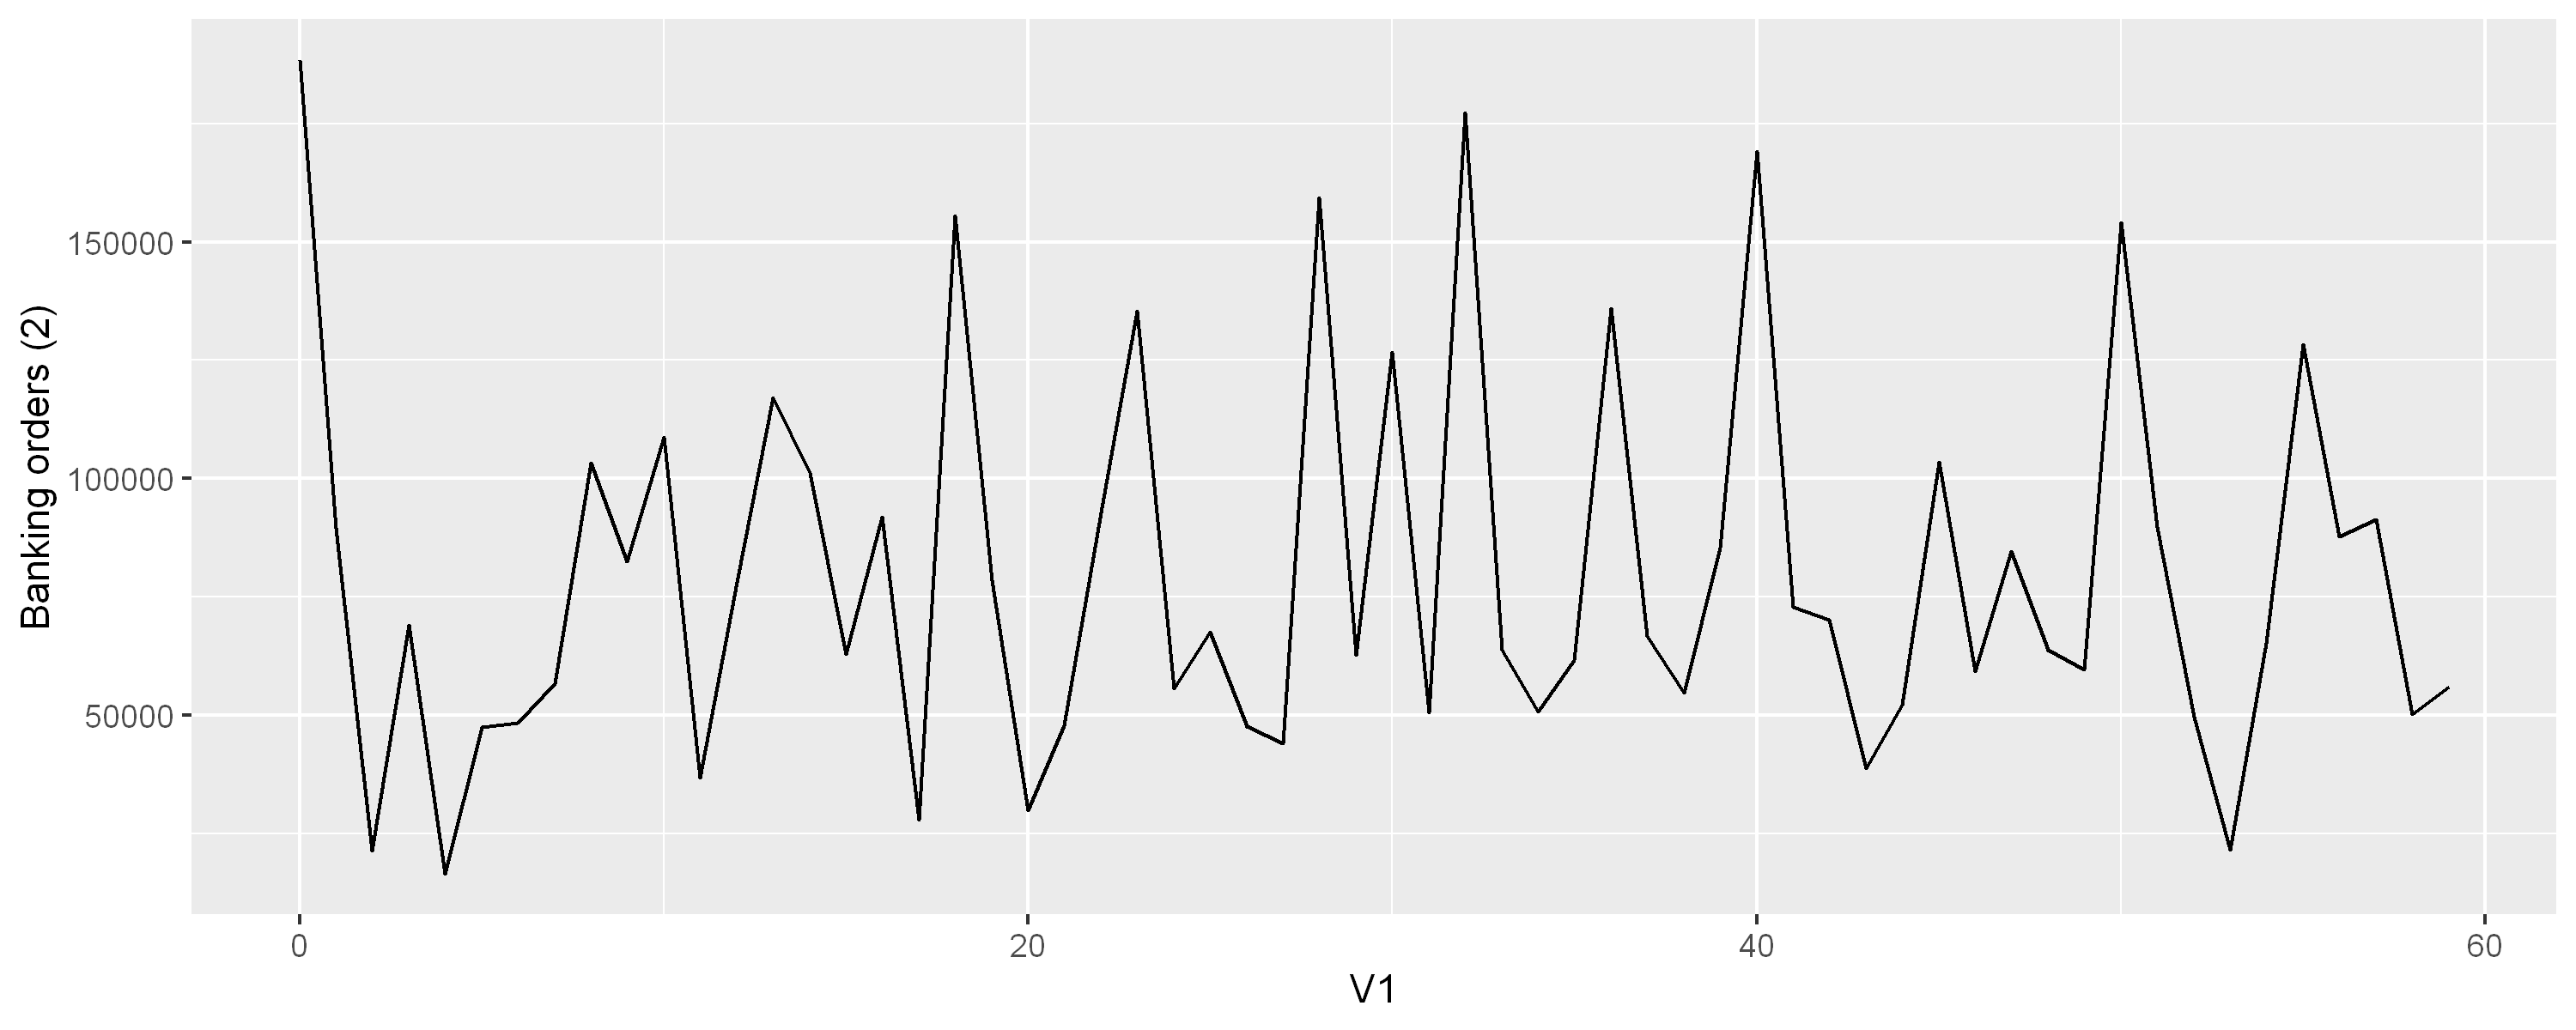

In [18]:
options(repr.plot.res=300, repr.plot.width=10, repr.plot.height=4)

ggplot(data = data, mapping = aes(x = V1,y = `Banking orders (2)`)) +
geom_line()

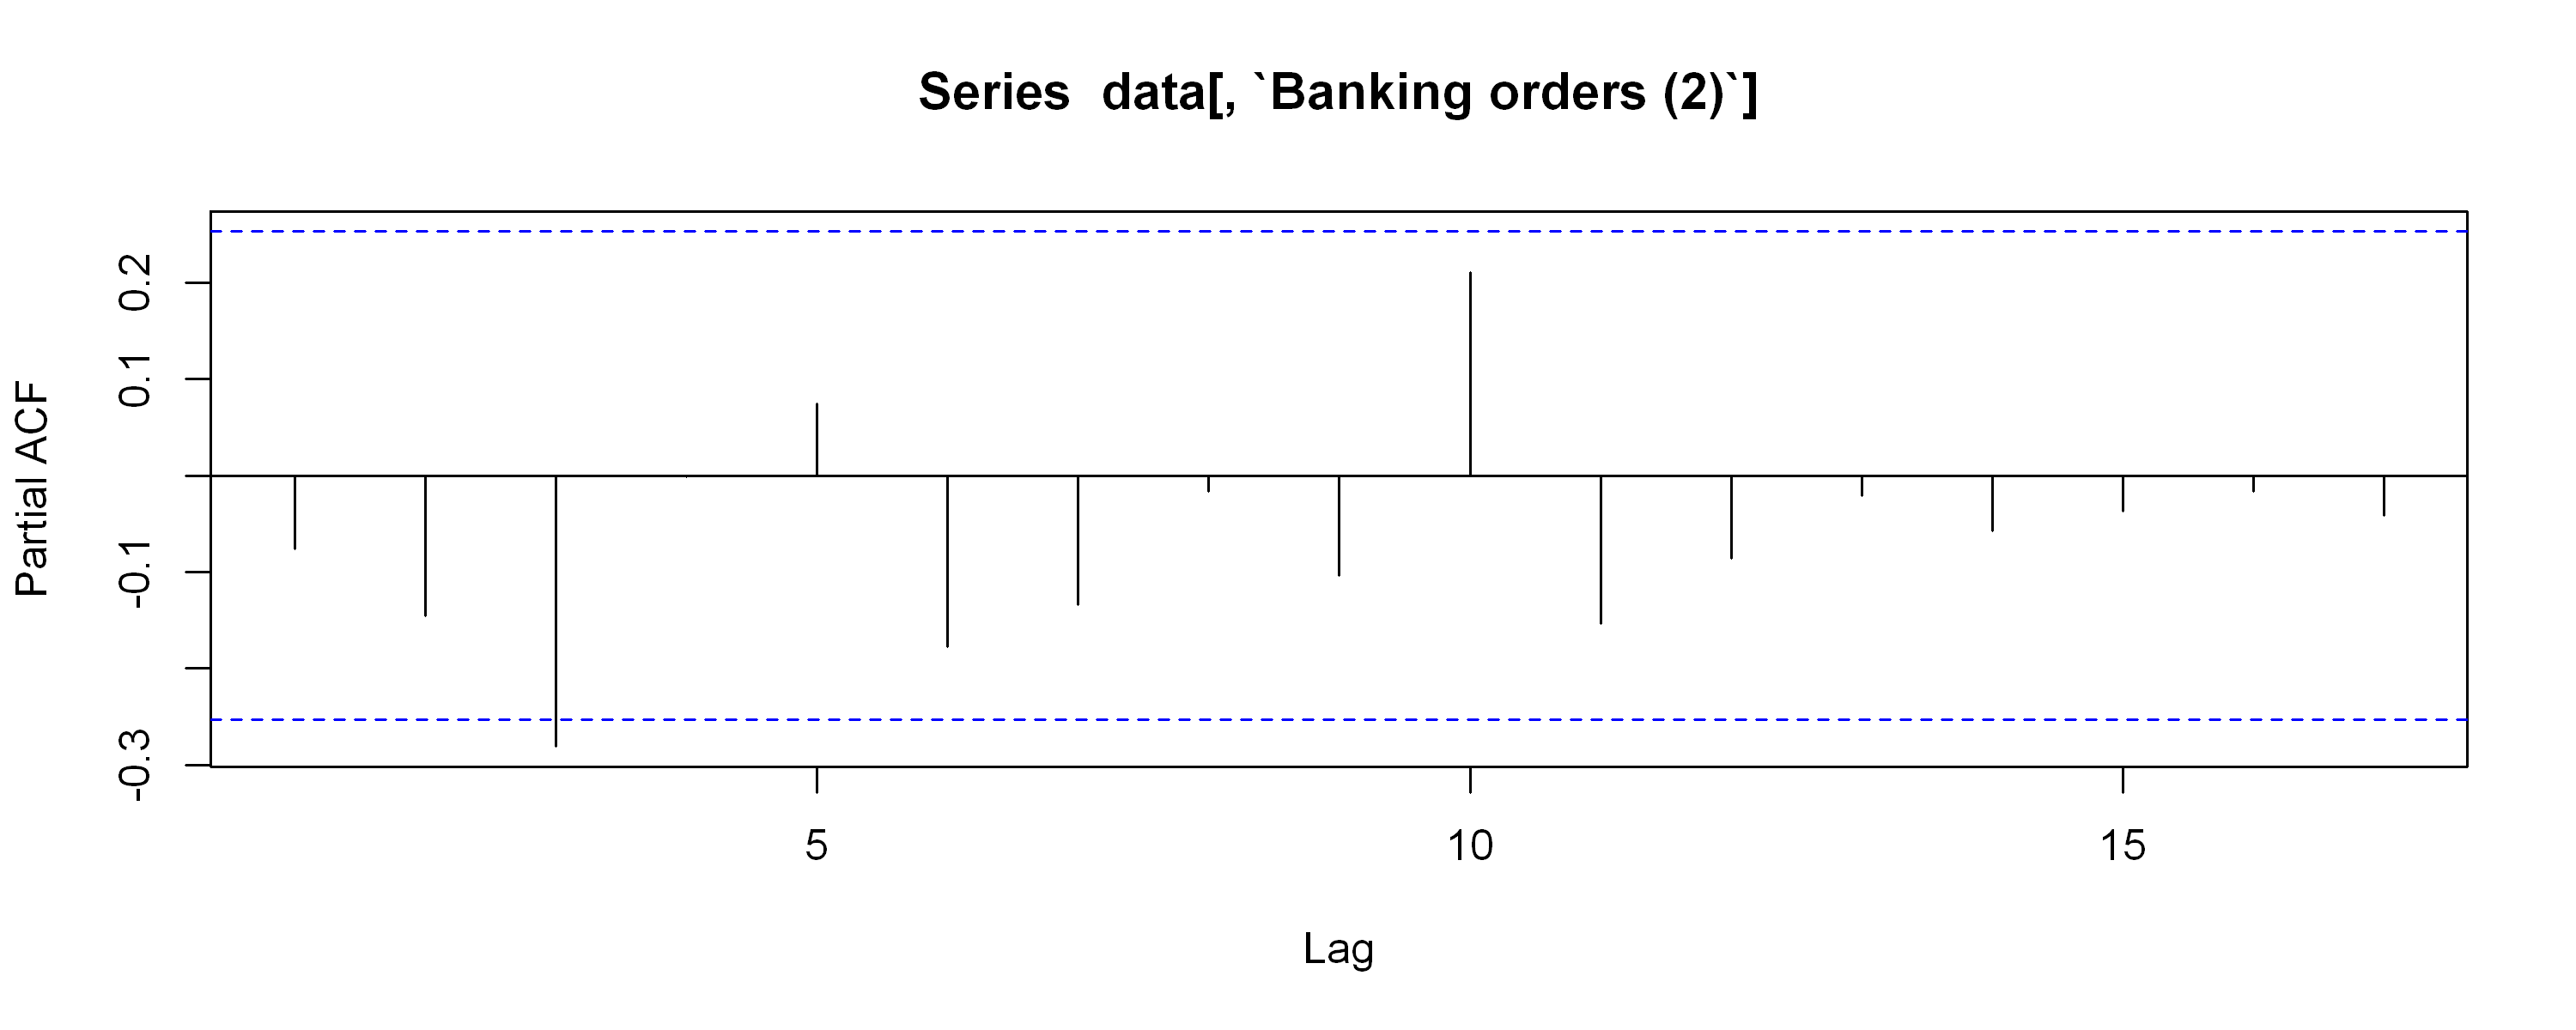

In [20]:
par(bg = "white")
pacf(data[, `Banking orders (2)`])

In [21]:
# R
fit = ar(data[, `Banking orders (2)`], method = "mle")
fit


Call:
ar(x = data[, `Banking orders (2)`], method = "mle")

Coefficients:
      1        2        3  
-0.1360  -0.2014  -0.3175  

Order selected 3  sigma^2 estimated as  1.414e+09

In [22]:
est.0 = arima(
    x = data[, `Banking orders (2)`],
    order = c(3, 0, 0)
)
est.0


Call:
arima(x = data[, `Banking orders (2)`], order = c(3, 0, 0))

Coefficients:
          ar1      ar2      ar3  intercept
      -0.1358  -0.2013  -0.3176  79075.350
s.e.   0.1299   0.1289   0.1296   2981.124

sigma^2 estimated as 1.414e+09:  log likelihood = -717.42,  aic = 1444.83

In [29]:
est.1 = arima(
    x = data[, `Banking orders (2)`],
    order = c(3, 0, 0),
    fixed = c(0, NA, NA, NA),
    transform.pars = FALSE
)
est.1


Call:
arima(x = data[, `Banking orders (2)`], order = c(3, 0, 0), transform.pars = FALSE, 
    fixed = c(0, NA, NA, NA))

Coefficients:
      ar1      ar2      ar3  intercept
        0  -0.1831  -0.3031  79190.705
s.e.    0   0.1289   0.1298   3345.253

sigma^2 estimated as 1.44e+09:  log likelihood = -717.96,  aic = 1443.91

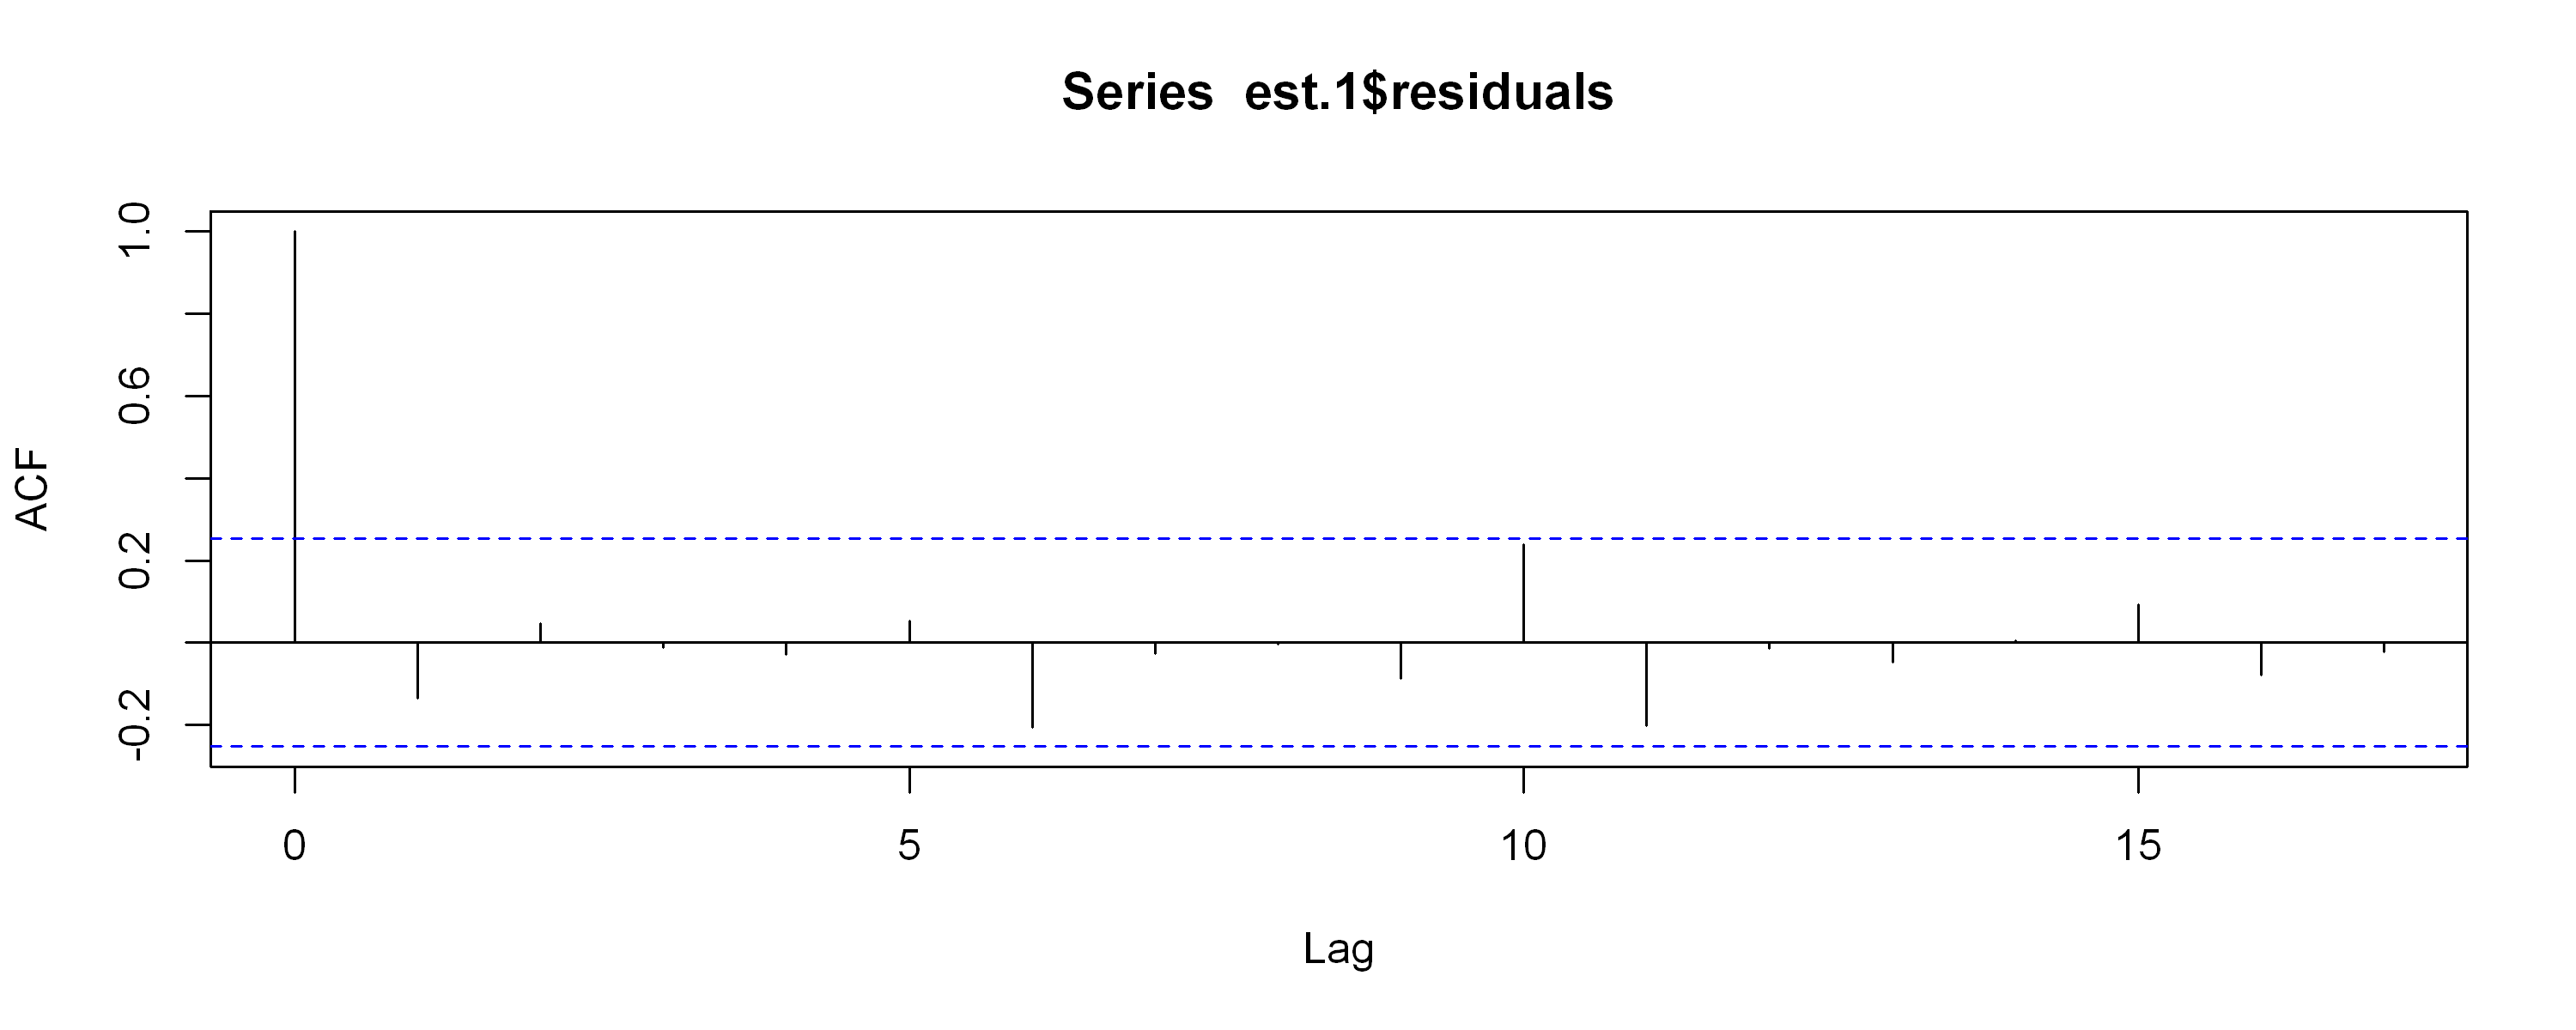

In [31]:
par(bg="white")
acf(est.1$residuals)

> Apesar do acf não passar nenhum threshold de significancia. não podemos avilia-la ou rejeita-la.

Outro teste normalmente realizado é do teste de Ljung-Box

$H_0 :$ Os dados não apresentam uma correlação serial \
$H_1 :$ Os dados apresentam um correlação serial

In [33]:
Box.test(
    est.1$residuals, lag = 10, type = "Ljung-Box", fitdf = 3
)


	Box-Ljung test

data:  est.1$residuals
X-squared = 9.3261, df = 7, p-value = 0.2301


#### Previsão com um processo AR(p)

1.  **Previsões um passo a frente :**
    -   Prever um passo a frente com um modelo AR

In [34]:
fores = forecast(est.1)

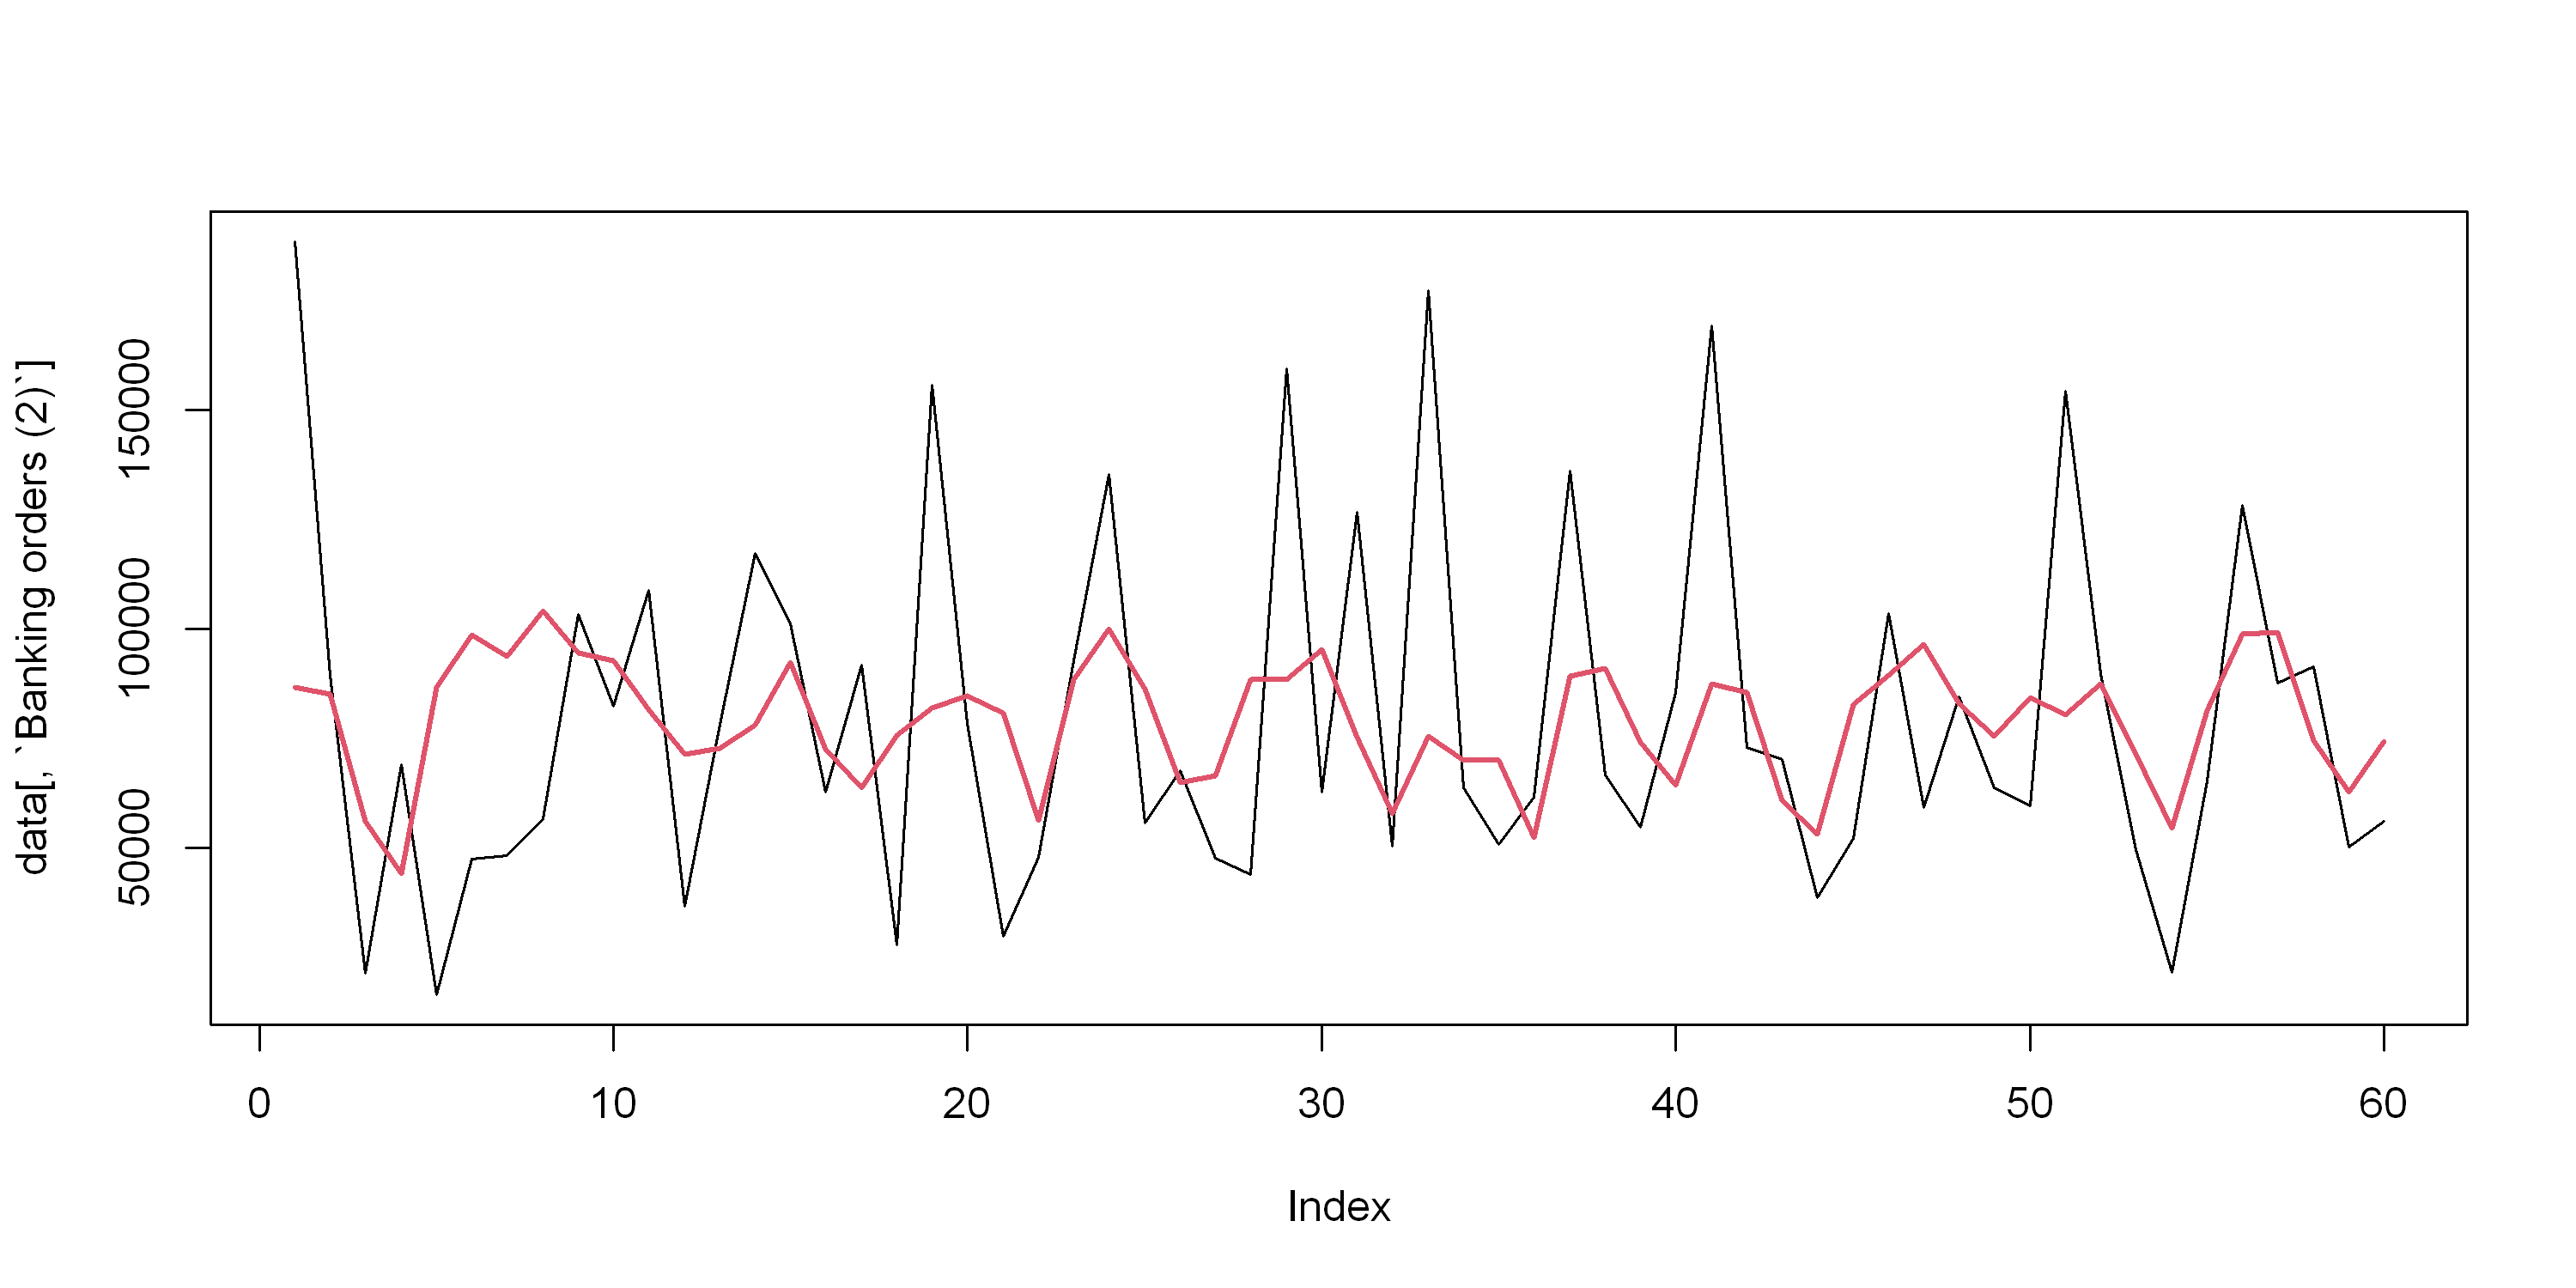

In [49]:
par(bg = "white")
options(repr.plot.res=300, repr.plot.width=10, repr.plot.height=5)

plot(data[, `Banking orders (2)`], type='l')
lines(fores$fitted, col=2, lwd=2)

In [54]:
fores$fitted

A Time Series:
 [1]  86598.68  85060.12  56078.02  44204.85  86677.79  98592.36  93759.43
 [8] 104018.70  94452.02  92688.13  81589.53  71273.26  72812.24  78022.74
[15]  92261.97  72556.50  63686.50  75567.32  81853.01  84770.94  80750.12
[22]  56174.38  88467.93  99888.38  86233.48  64818.36  66502.35  88465.38
[29]  88490.42  95234.16  75195.37  57901.02  75491.94  70077.16  69954.48
[36]  52311.71  89092.00  91029.77  74115.30  64240.01  87434.62  85459.10
[43]  60853.28  53105.38  82763.66  89343.12  96438.65  82934.58  75457.17
[50]  84257.72  80386.23  87465.75  71429.63  54546.83  81414.68  98697.42
[57]  99217.05  74444.42  62755.17  74379.35

In [63]:
cor(diff(data$`Banking orders (2)`), diff(fores$fitted))

[1] 0.2326063

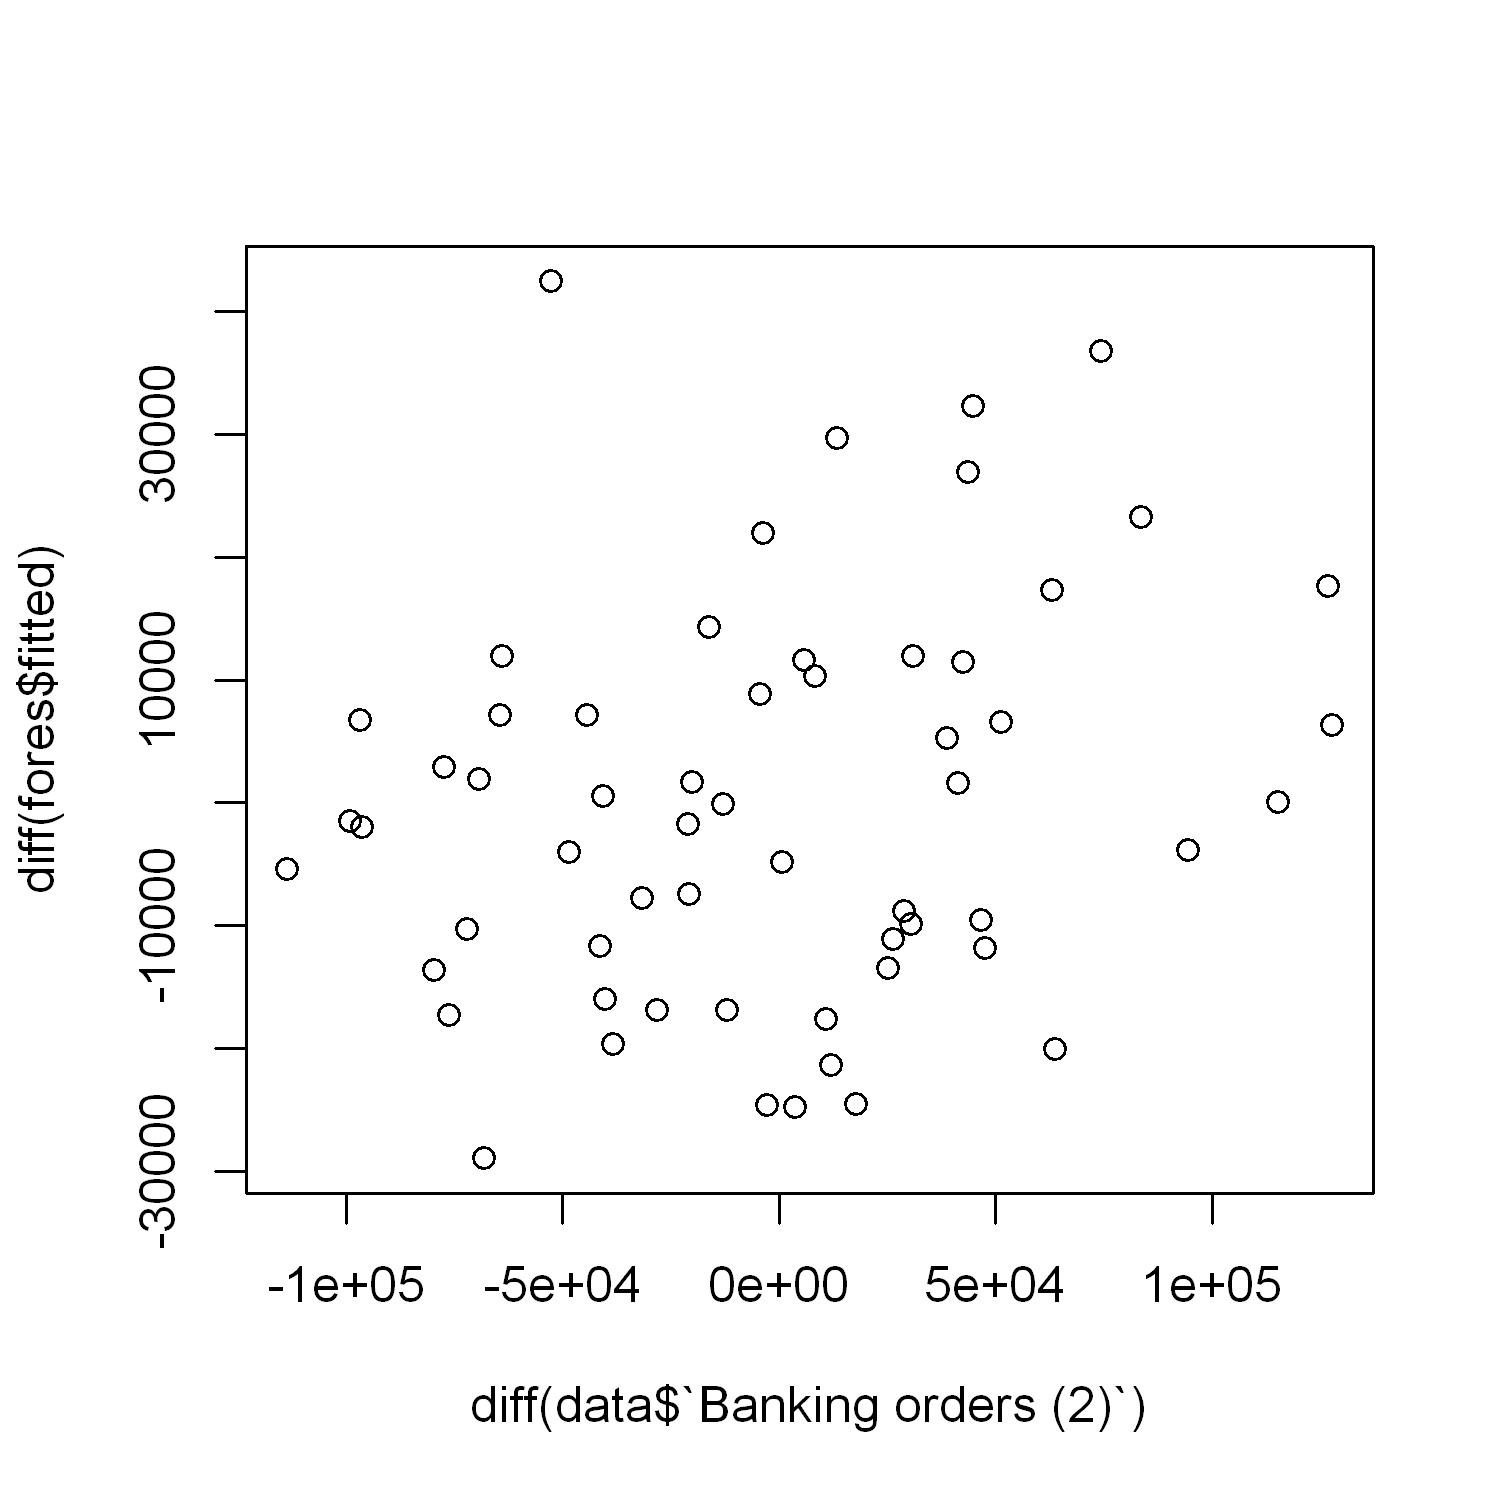

In [ ]:
par(bg = "white")
options(repr.plot.res=300, repr.plot.width=5, repr.plot.height=5)

plot(diff(data$`Banking orders (2)`), diff(fores$fitted) )

2. **Previsão Multipassos a frente**

In [65]:
for_3 = forecast(est.1,h = 3)

In [70]:
var(for_3$fitted, na.rm = TRUE)

[1] 191885952

> **Modelos Autoregressivo** são melhores para predições de curto prazo(ARIMA, ARMA, MA)

### Modelos de média movel

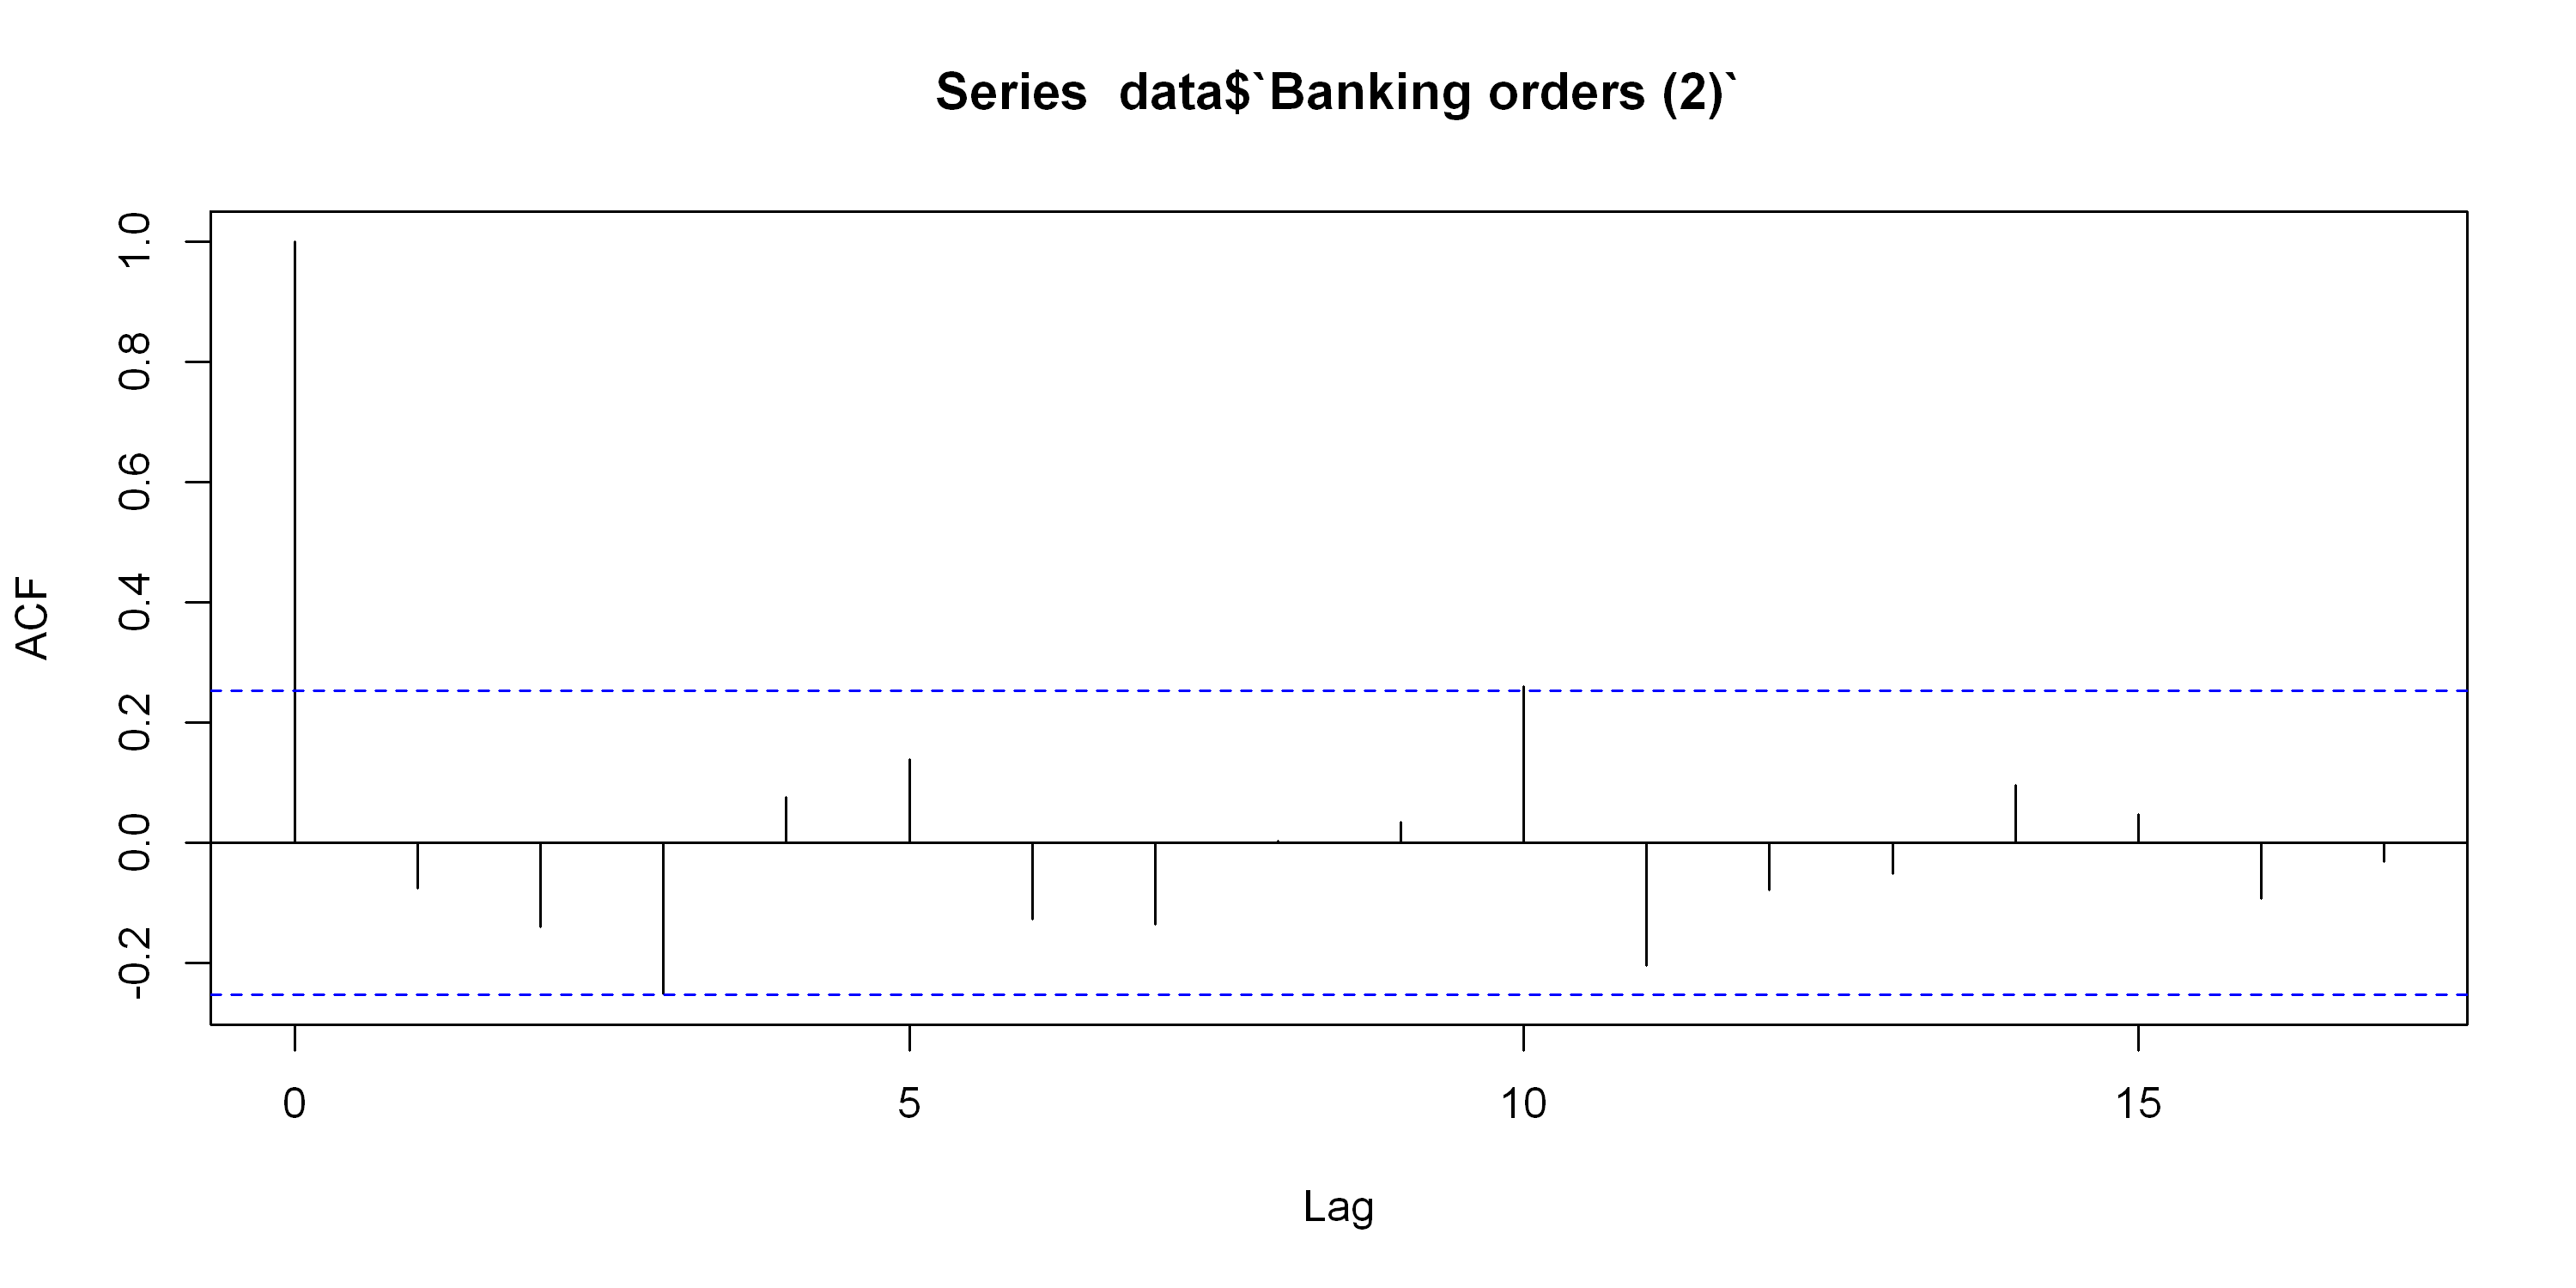

In [72]:
par(bg = "white")
options(repr.plot.res=300, repr.plot.width=10, repr.plot.height=5)
acf(data$`Banking orders (2)`)

In [74]:
ma.est = arima(
    x = data$`Banking orders (2)`,
    order = c(0, 0, 9),
    fixed = c(0, 0, NA, rep(0, 5), NA, NA)
)
ma.est


Call:
arima(x = data$`Banking orders (2)`, order = c(0, 0, 9), fixed = c(0, 0, NA, 
    rep(0, 5), NA, NA))

Coefficients:
      ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8      ma9  intercept
        0    0  -0.4725    0    0    0    0    0  -0.0120  79689.809
s.e.    0    0   0.1459    0    0    0    0    0   0.1444   2674.593

sigma^2 estimated as 1.4e+09:  log likelihood = -717.31,  aic = 1442.61

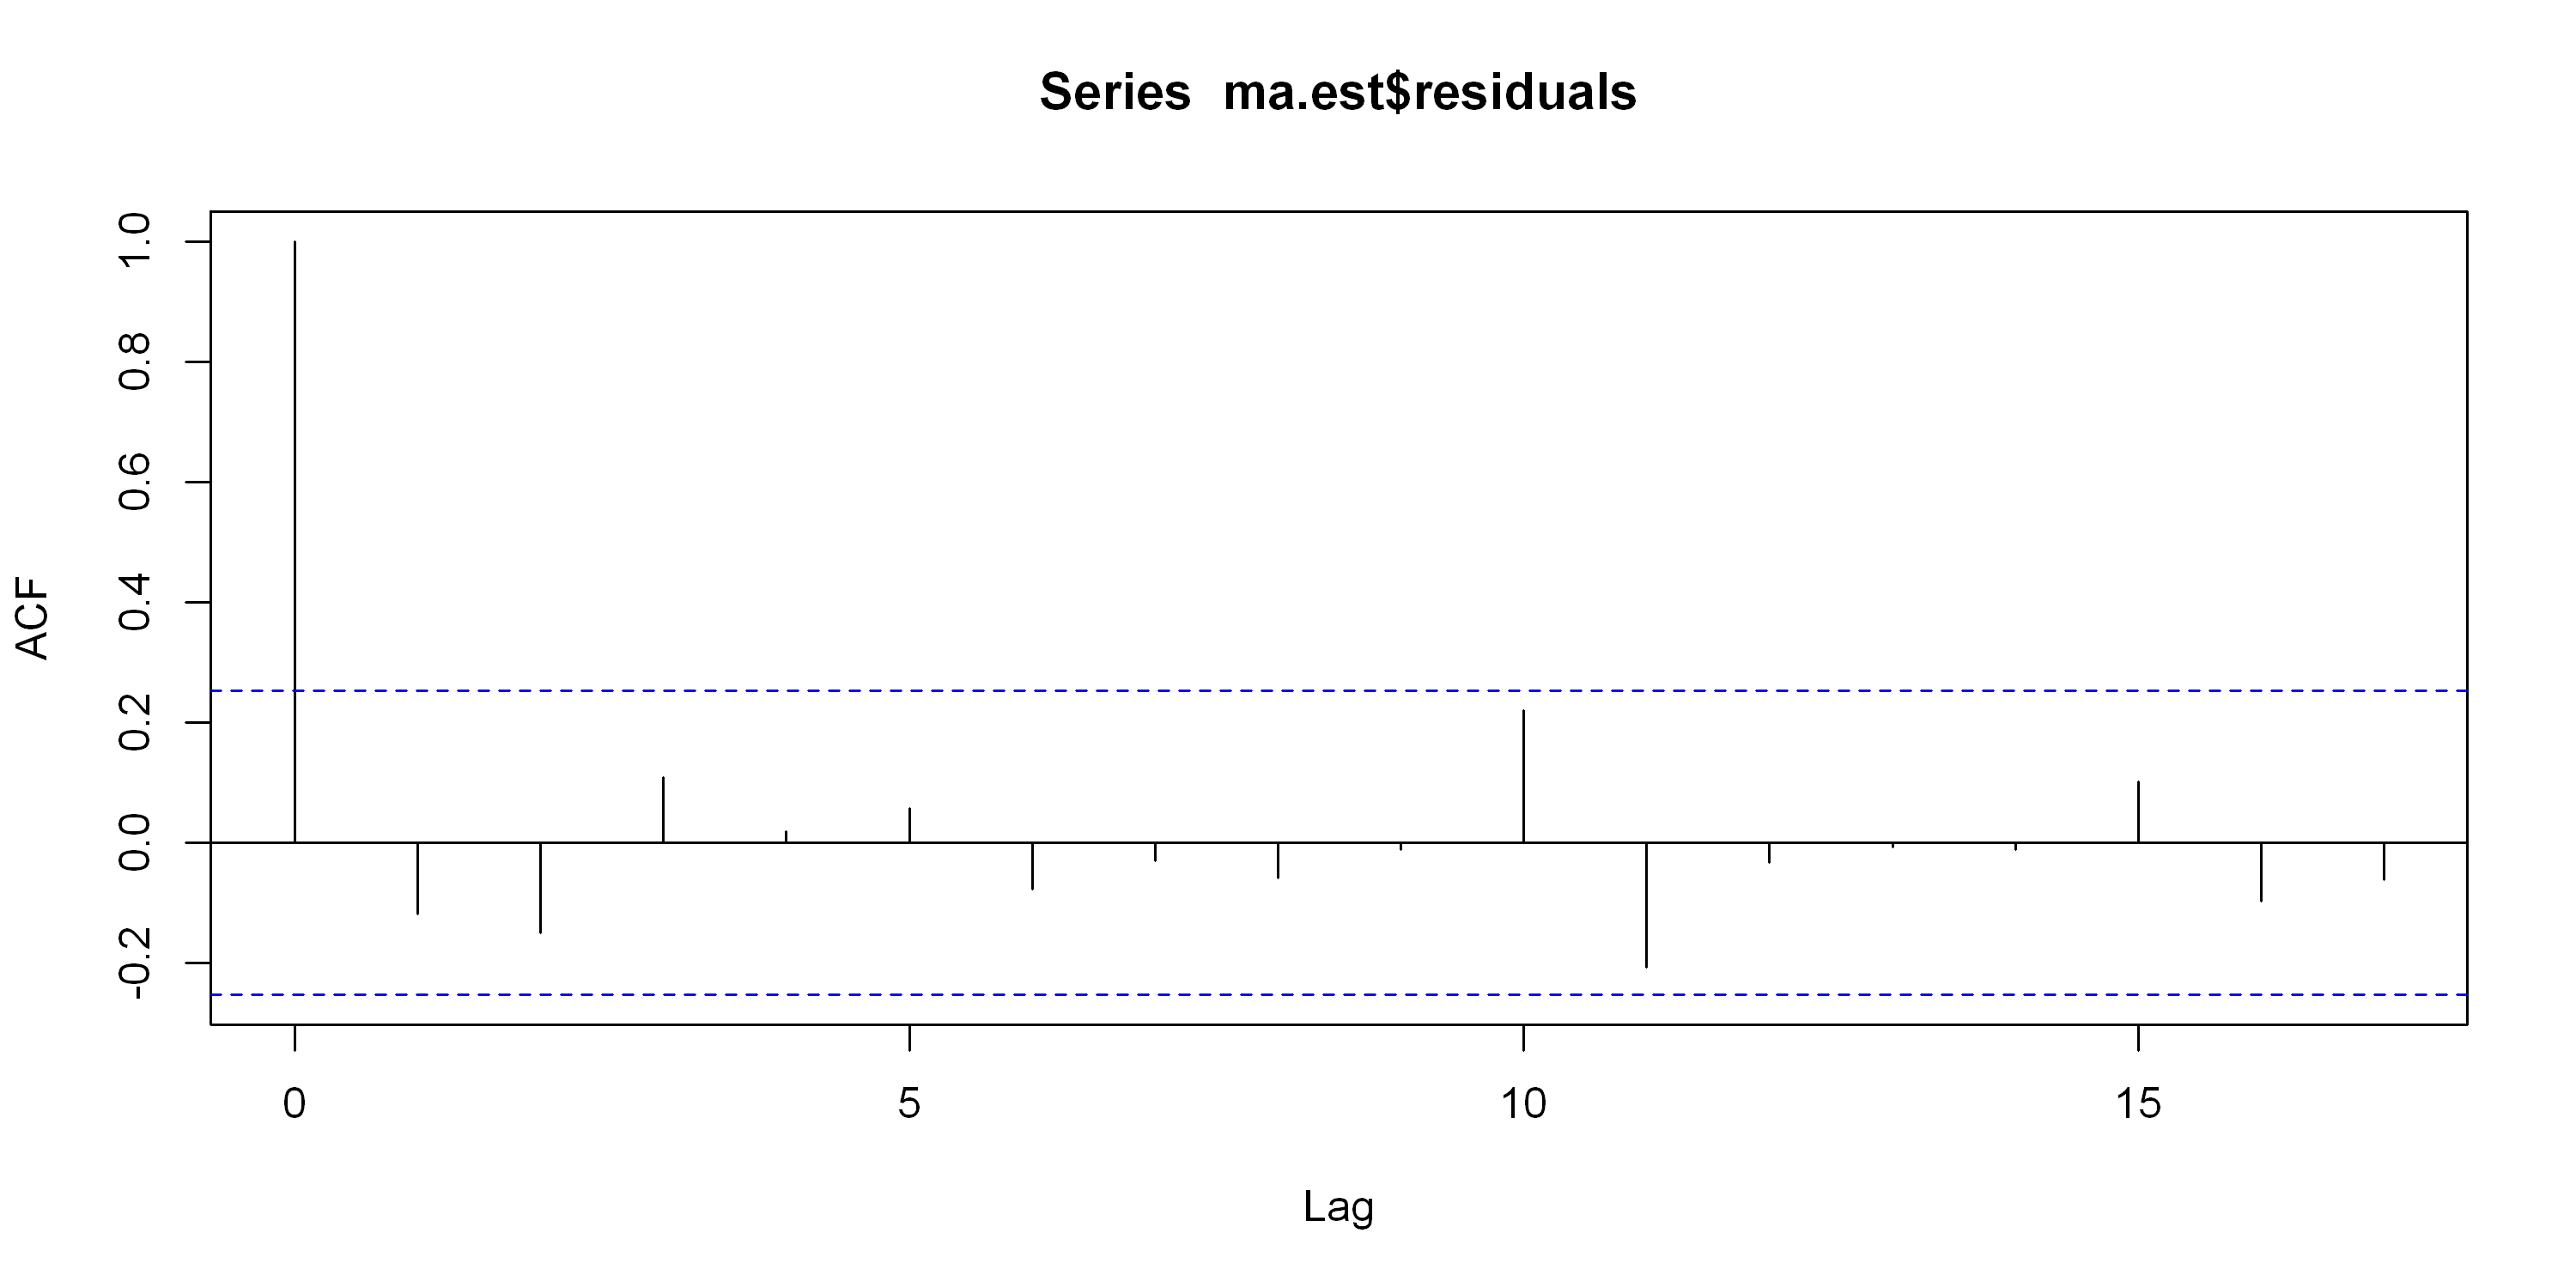

In [76]:
# acf dos residuos
par(bg = "white")
acf(ma.est$residuals)

In [77]:
Box.test(
    x = ma.est$residuals,
    lag = 10, type="Ljung-Box", fitdf = 3
)


	Box-Ljung test

data:  ma.est$residuals
X-squared = 7.6516, df = 7, p-value = 0.3643


> P_valor > 0.05, ele não apresenta um correlação serial 

In [83]:
fores = forecast(ma.est,h = 1)
fores$fitted

A Time Series:
 [1]  90116.64  80626.91  74090.45  38321.61  74734.77 101153.20  65930.90
 [8] 106351.80 104138.05  86938.99 102868.16  80502.02  81466.01  77619.15
[15] 100984.93  81463.10  61622.54  79660.81  88563.91  65370.99 104679.89
[22]  48047.39  73070.29 115034.16  80034.03  70052.29  70728.85  90437.86
[29]  80684.44  91533.59 101668.18  42273.27  93055.40  68187.65  75863.50
[36]  40195.15  82368.91  90605.60  69924.83  54032.55  90866.20  85839.41
[43]  64932.70  43030.64  85575.32  76561.14  82047.95  95683.35  66553.13
[50]  89532.20  85102.64  80937.97  93926.74  47468.84  75223.67 100887.60
[57]  92059.32  84459.85  67112.16  80917.23

In [88]:
fores.10 = forecast(ma.est,h = 10)
fores.10

   Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
61       76320.92 28374.82 124267.0  2993.686 149648.2
62       88253.99 40307.89 136200.1 14926.755 161581.2
63       91767.10 43821.00 139713.2 18439.870 165094.3
64       79810.12 26781.13 132839.1 -1290.718 160911.0
65       79361.19 26332.20 132390.2 -1739.655 160462.0
66       79742.03 26713.04 132771.0 -1358.808 160842.9
67       79606.91 26577.92 132635.9 -1493.929 160707.8
68       79893.84 26864.85 132922.8 -1207.000 160994.7
69       79988.68 26959.69 133017.7 -1112.162 161089.5
70       79689.81 26657.70 132721.9 -1415.806 160795.4

In [89]:
mean(data$`Banking orders (2)`)

[1] 79401.48

> As previsoes convertem rapidamente para média do processo

### Modelos Autoregressivos integrados com a media model(ARIMA)
Esse modelo combina AR, MA reconhecendo que a mesma série temporal pode ter a dinamica dos modelos AR e MA subjacentes. ARIMA leva em conta a diferenciação, uma forma de remover tendencias e tornar uma série temporal estacionaria.

In [91]:
# Escolhendo parametros do modelo
set.seed(1017)
y <- arima.sim(n = 1000, model = list(ar = 0.5, ma = -0.3))

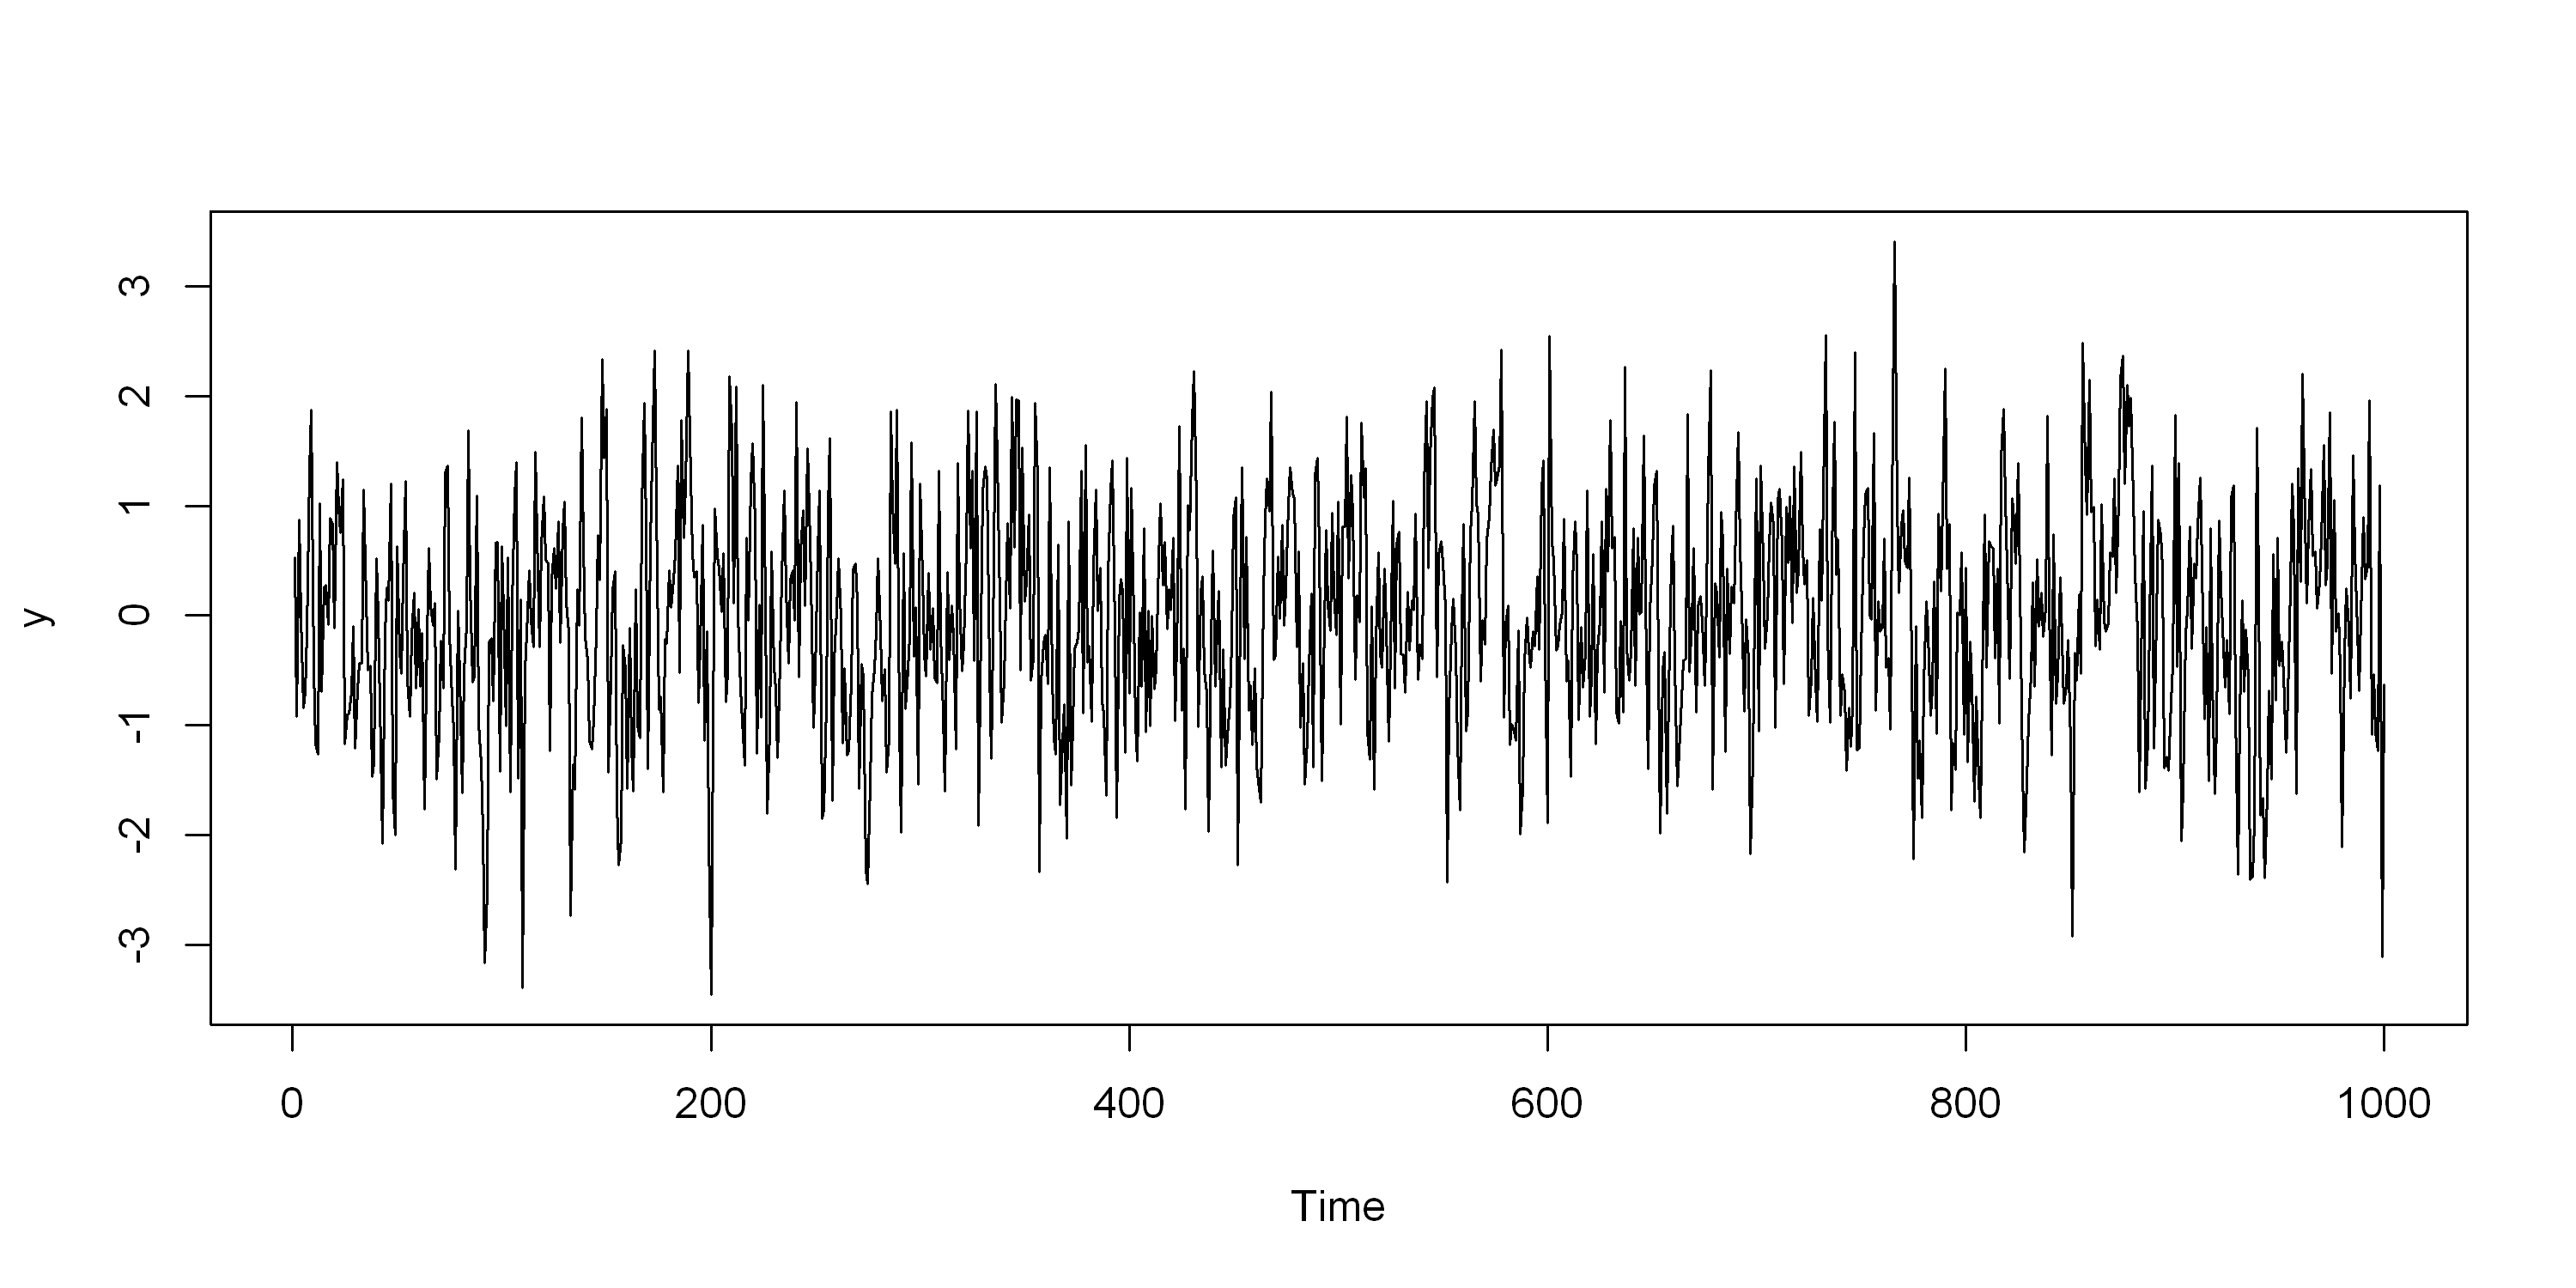

In [94]:
par(bg = "white")
plot(y)

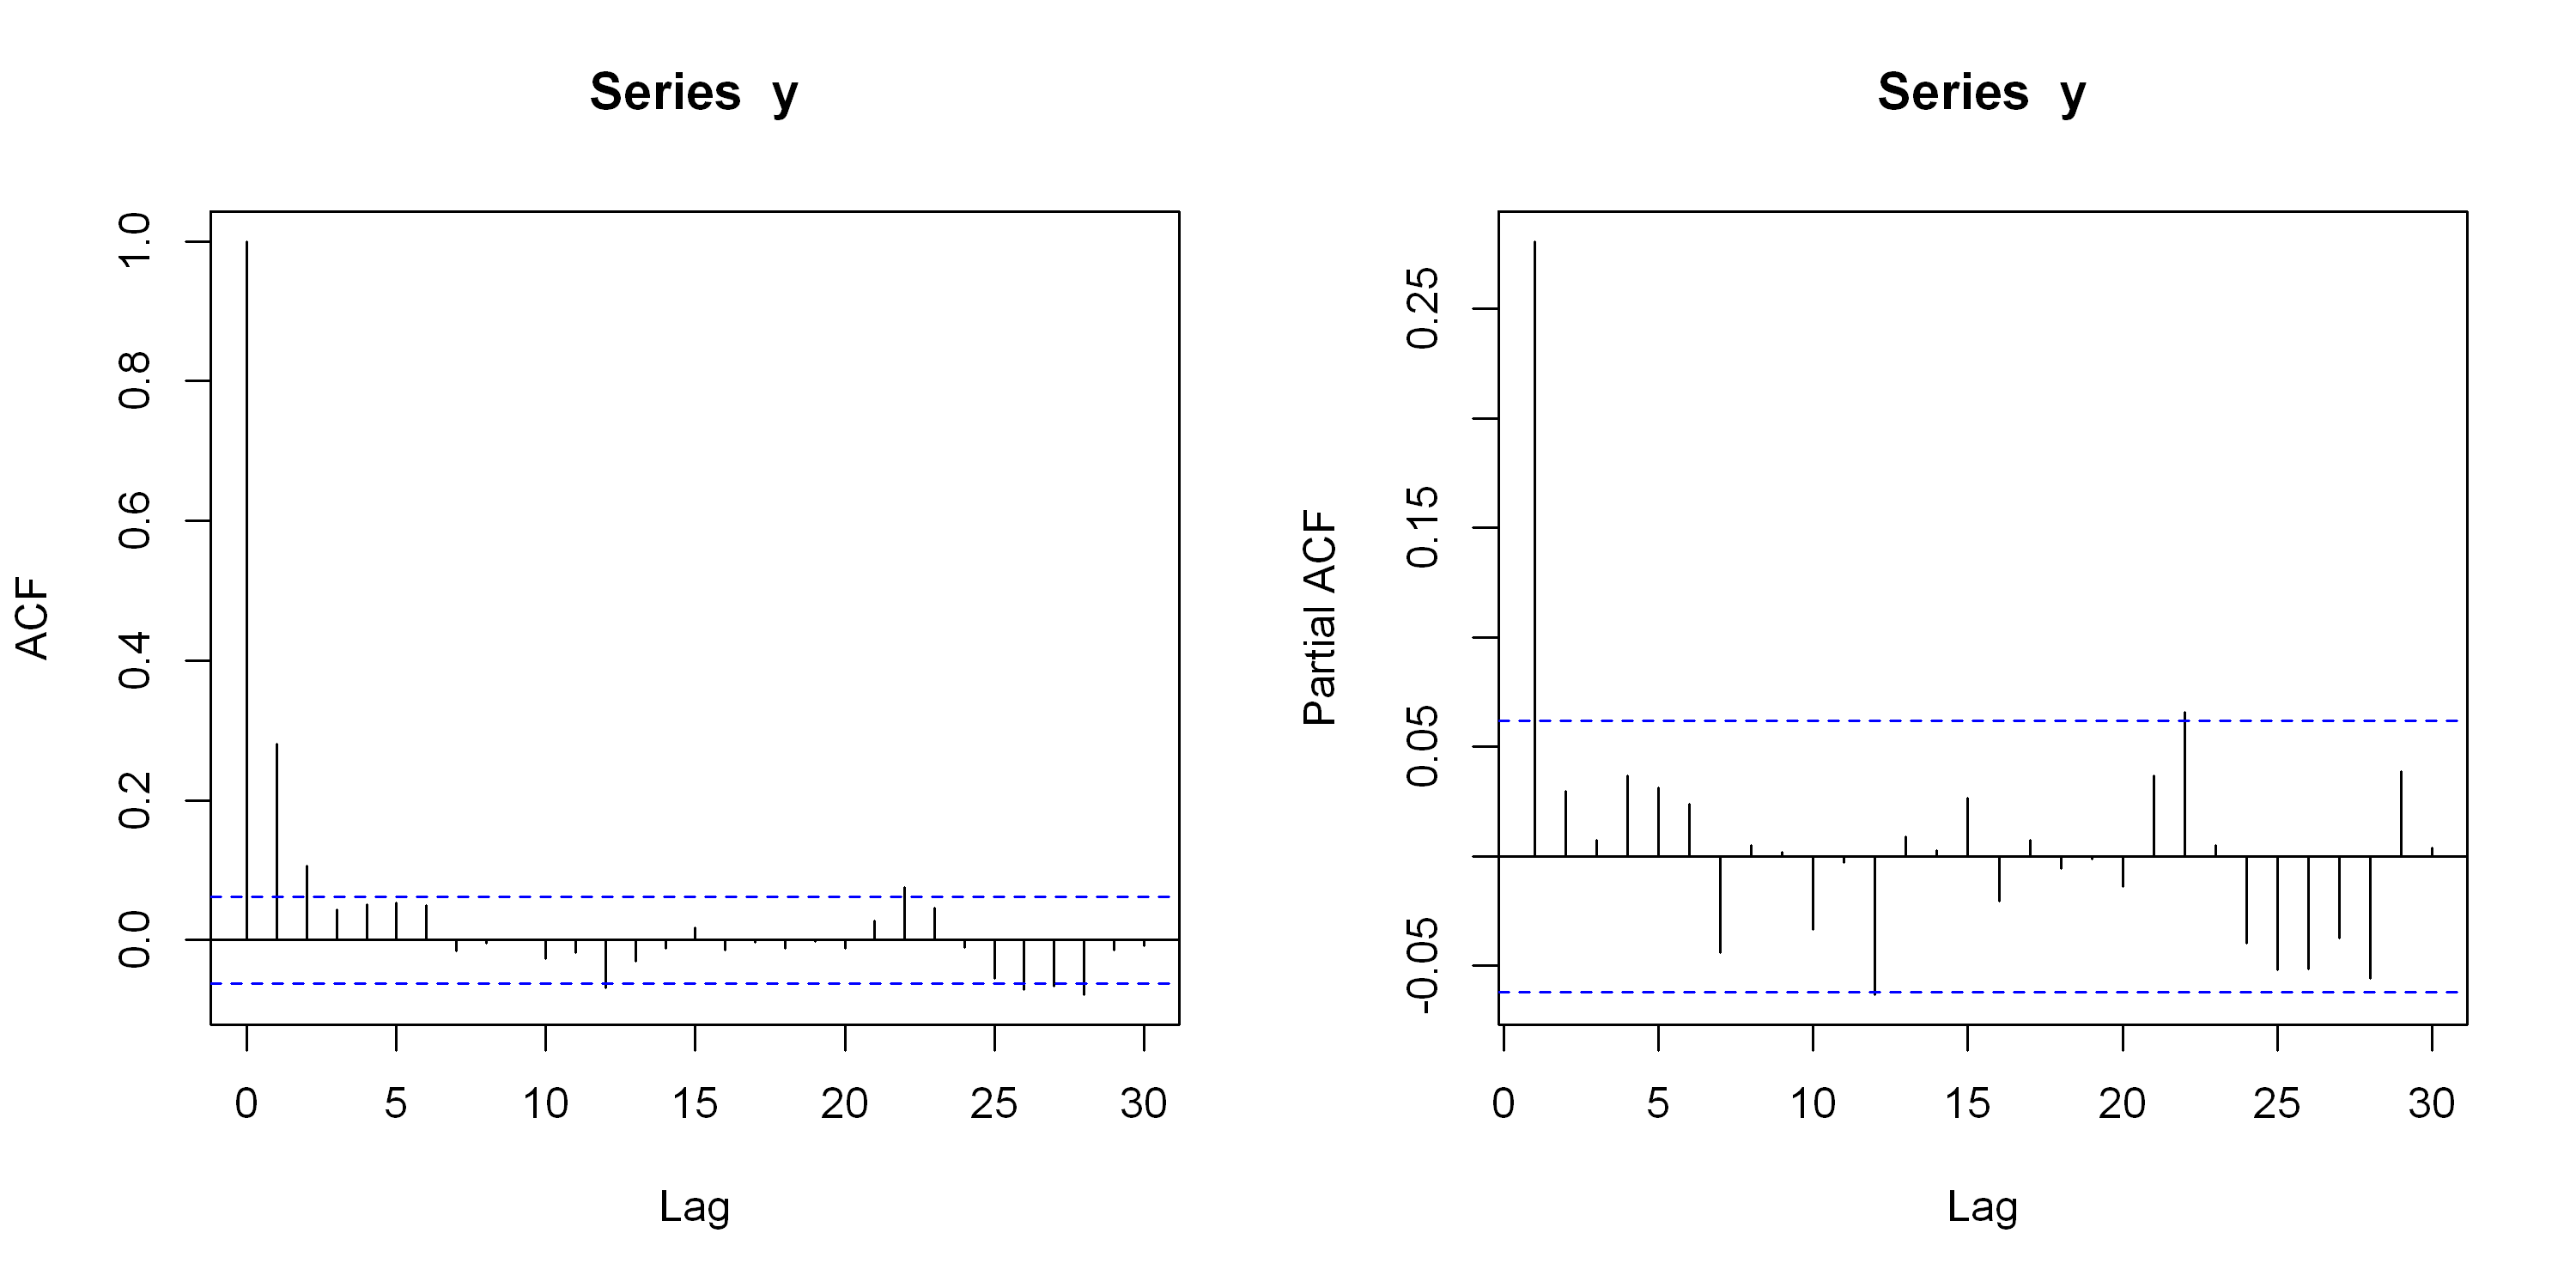

In [101]:
par(bg = "white", mfrow=c(1,2))
acf(y)
pacf(y)

In [103]:
arima.1 = Arima(
    y, order = c(1, 0, 1)
)
arima.1

Series: y 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1     mean
      0.3875  -0.1161  -0.0219
s.e.  0.1096   0.1187   0.0459

sigma^2 = 1.017:  log likelihood = -1425.66
AIC=2859.33   AICc=2859.37   BIC=2878.96

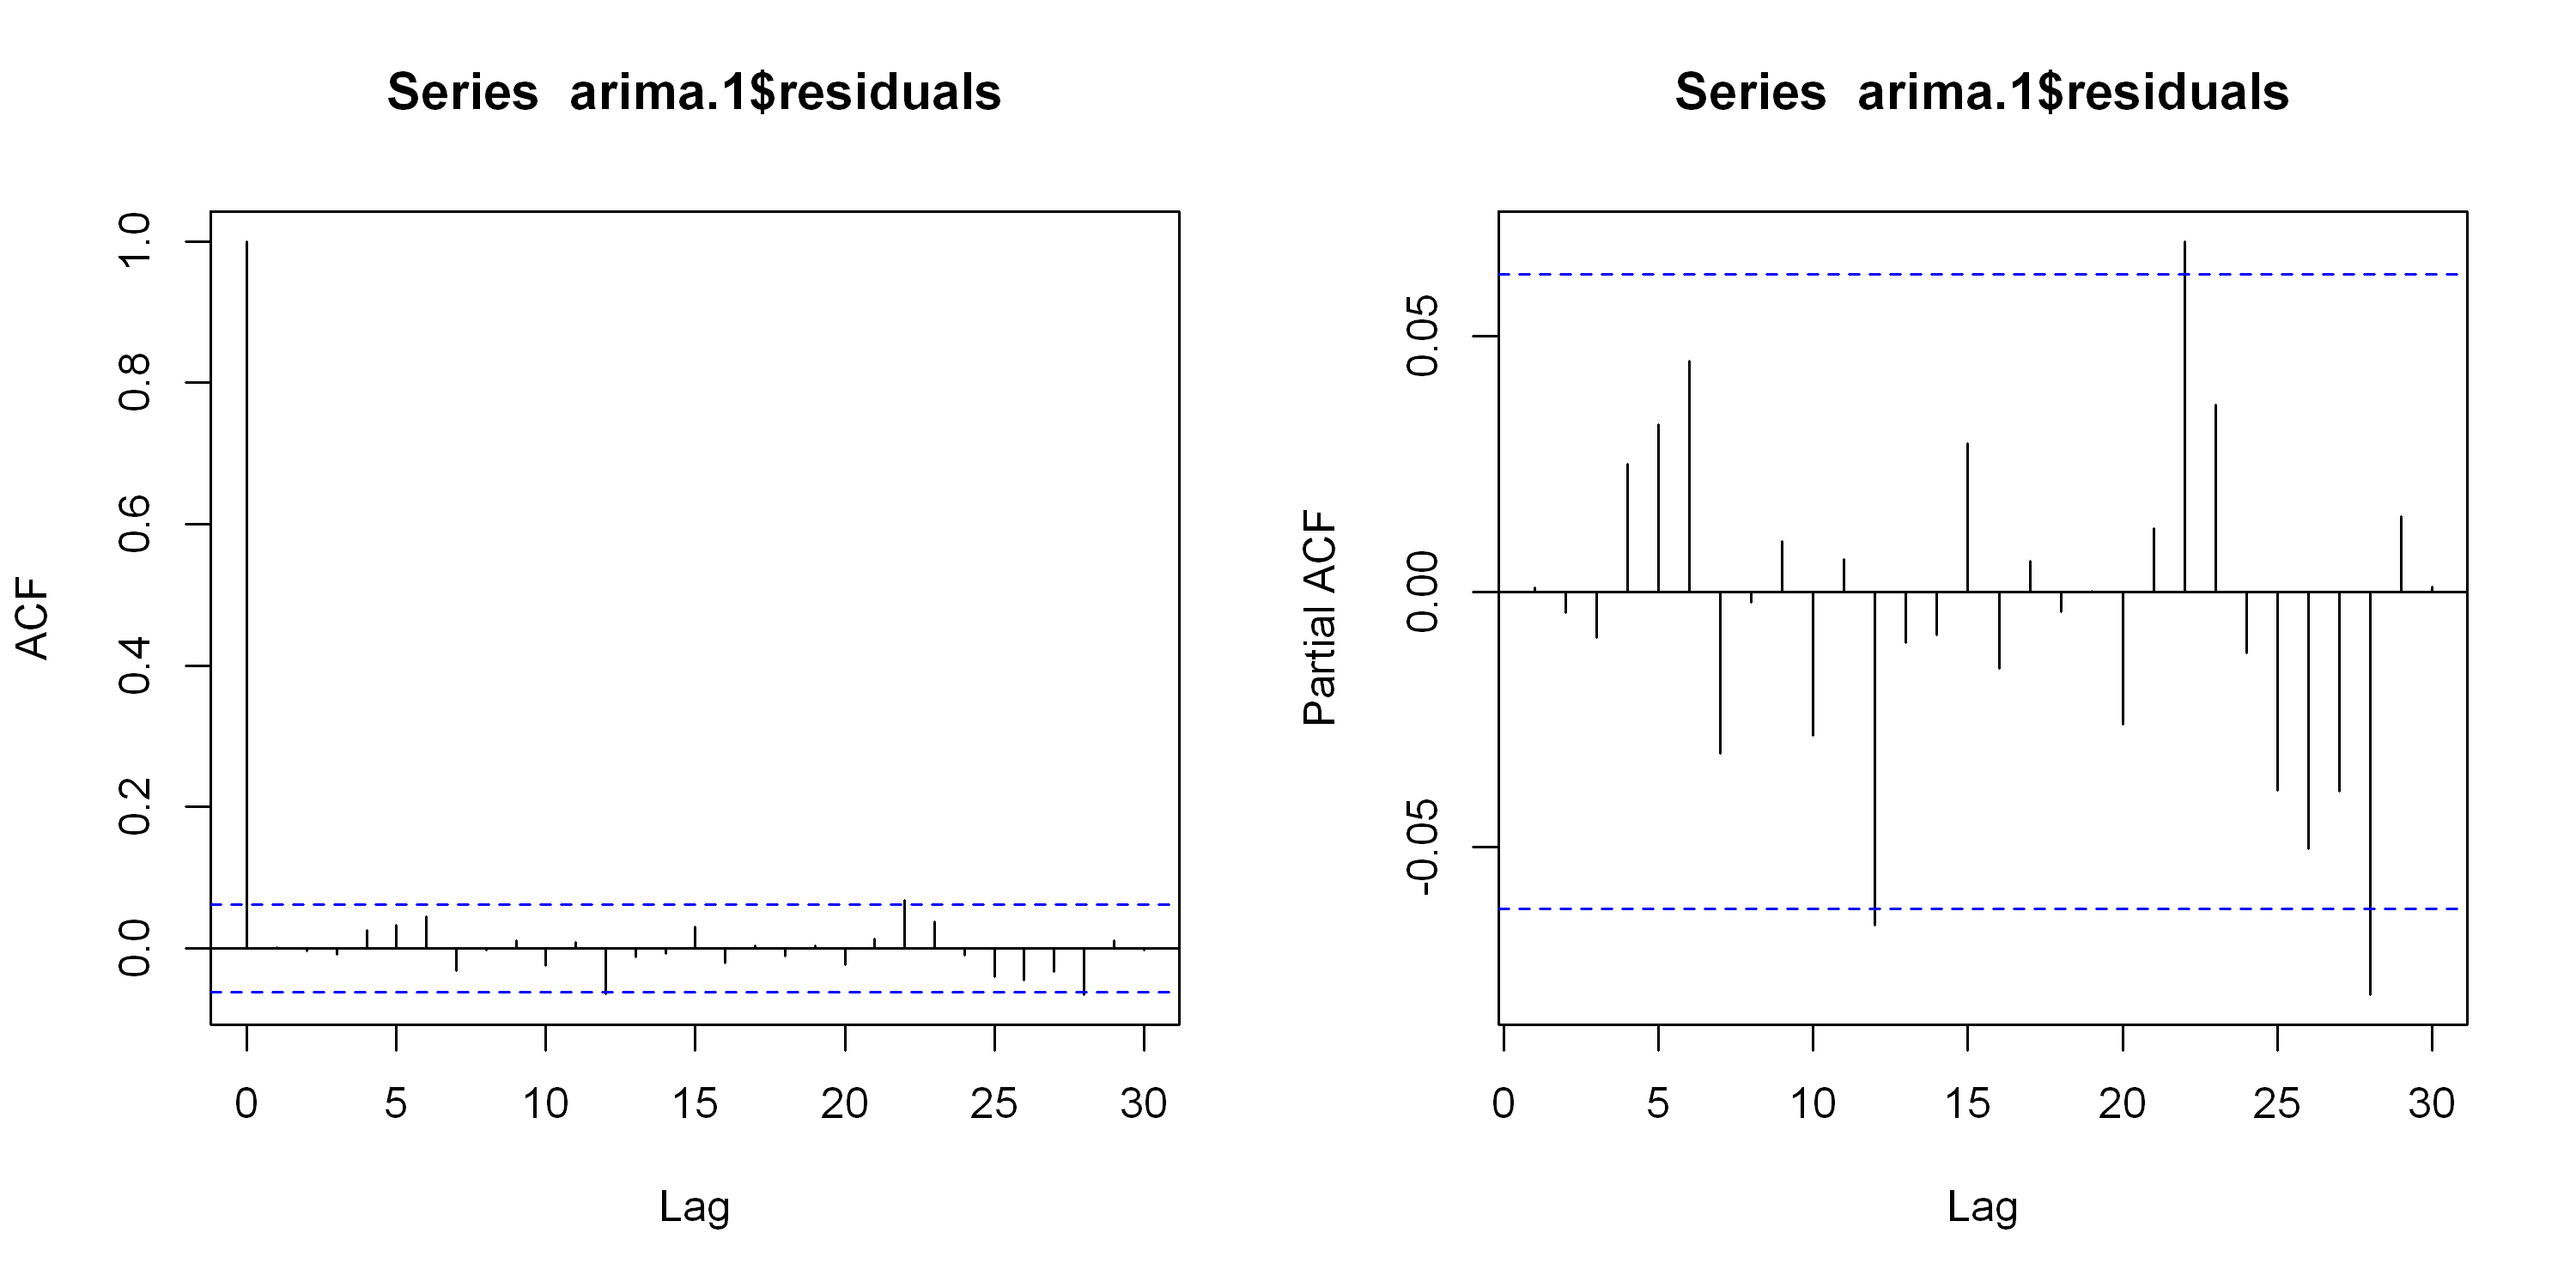

In [104]:
par(bg = "white", mfrow=c(1,2))
acf(arima.1$residuals)
pacf(arima.1$residuals)

In [106]:
est = auto.arima(data$`Banking orders (2)`, stepwise = FALSE, max.p = 3, max.q=9)

In [107]:
est

Series: data$`Banking orders (2)` 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
          ma1      ma2      ma3       mean
      -0.0645  -0.1144  -0.4796  79914.783
s.e.   0.1327   0.1150   0.1915   1897.407

sigma^2 = 1.467e+09:  log likelihood = -716.71
AIC=1443.42   AICc=1444.53   BIC=1453.89

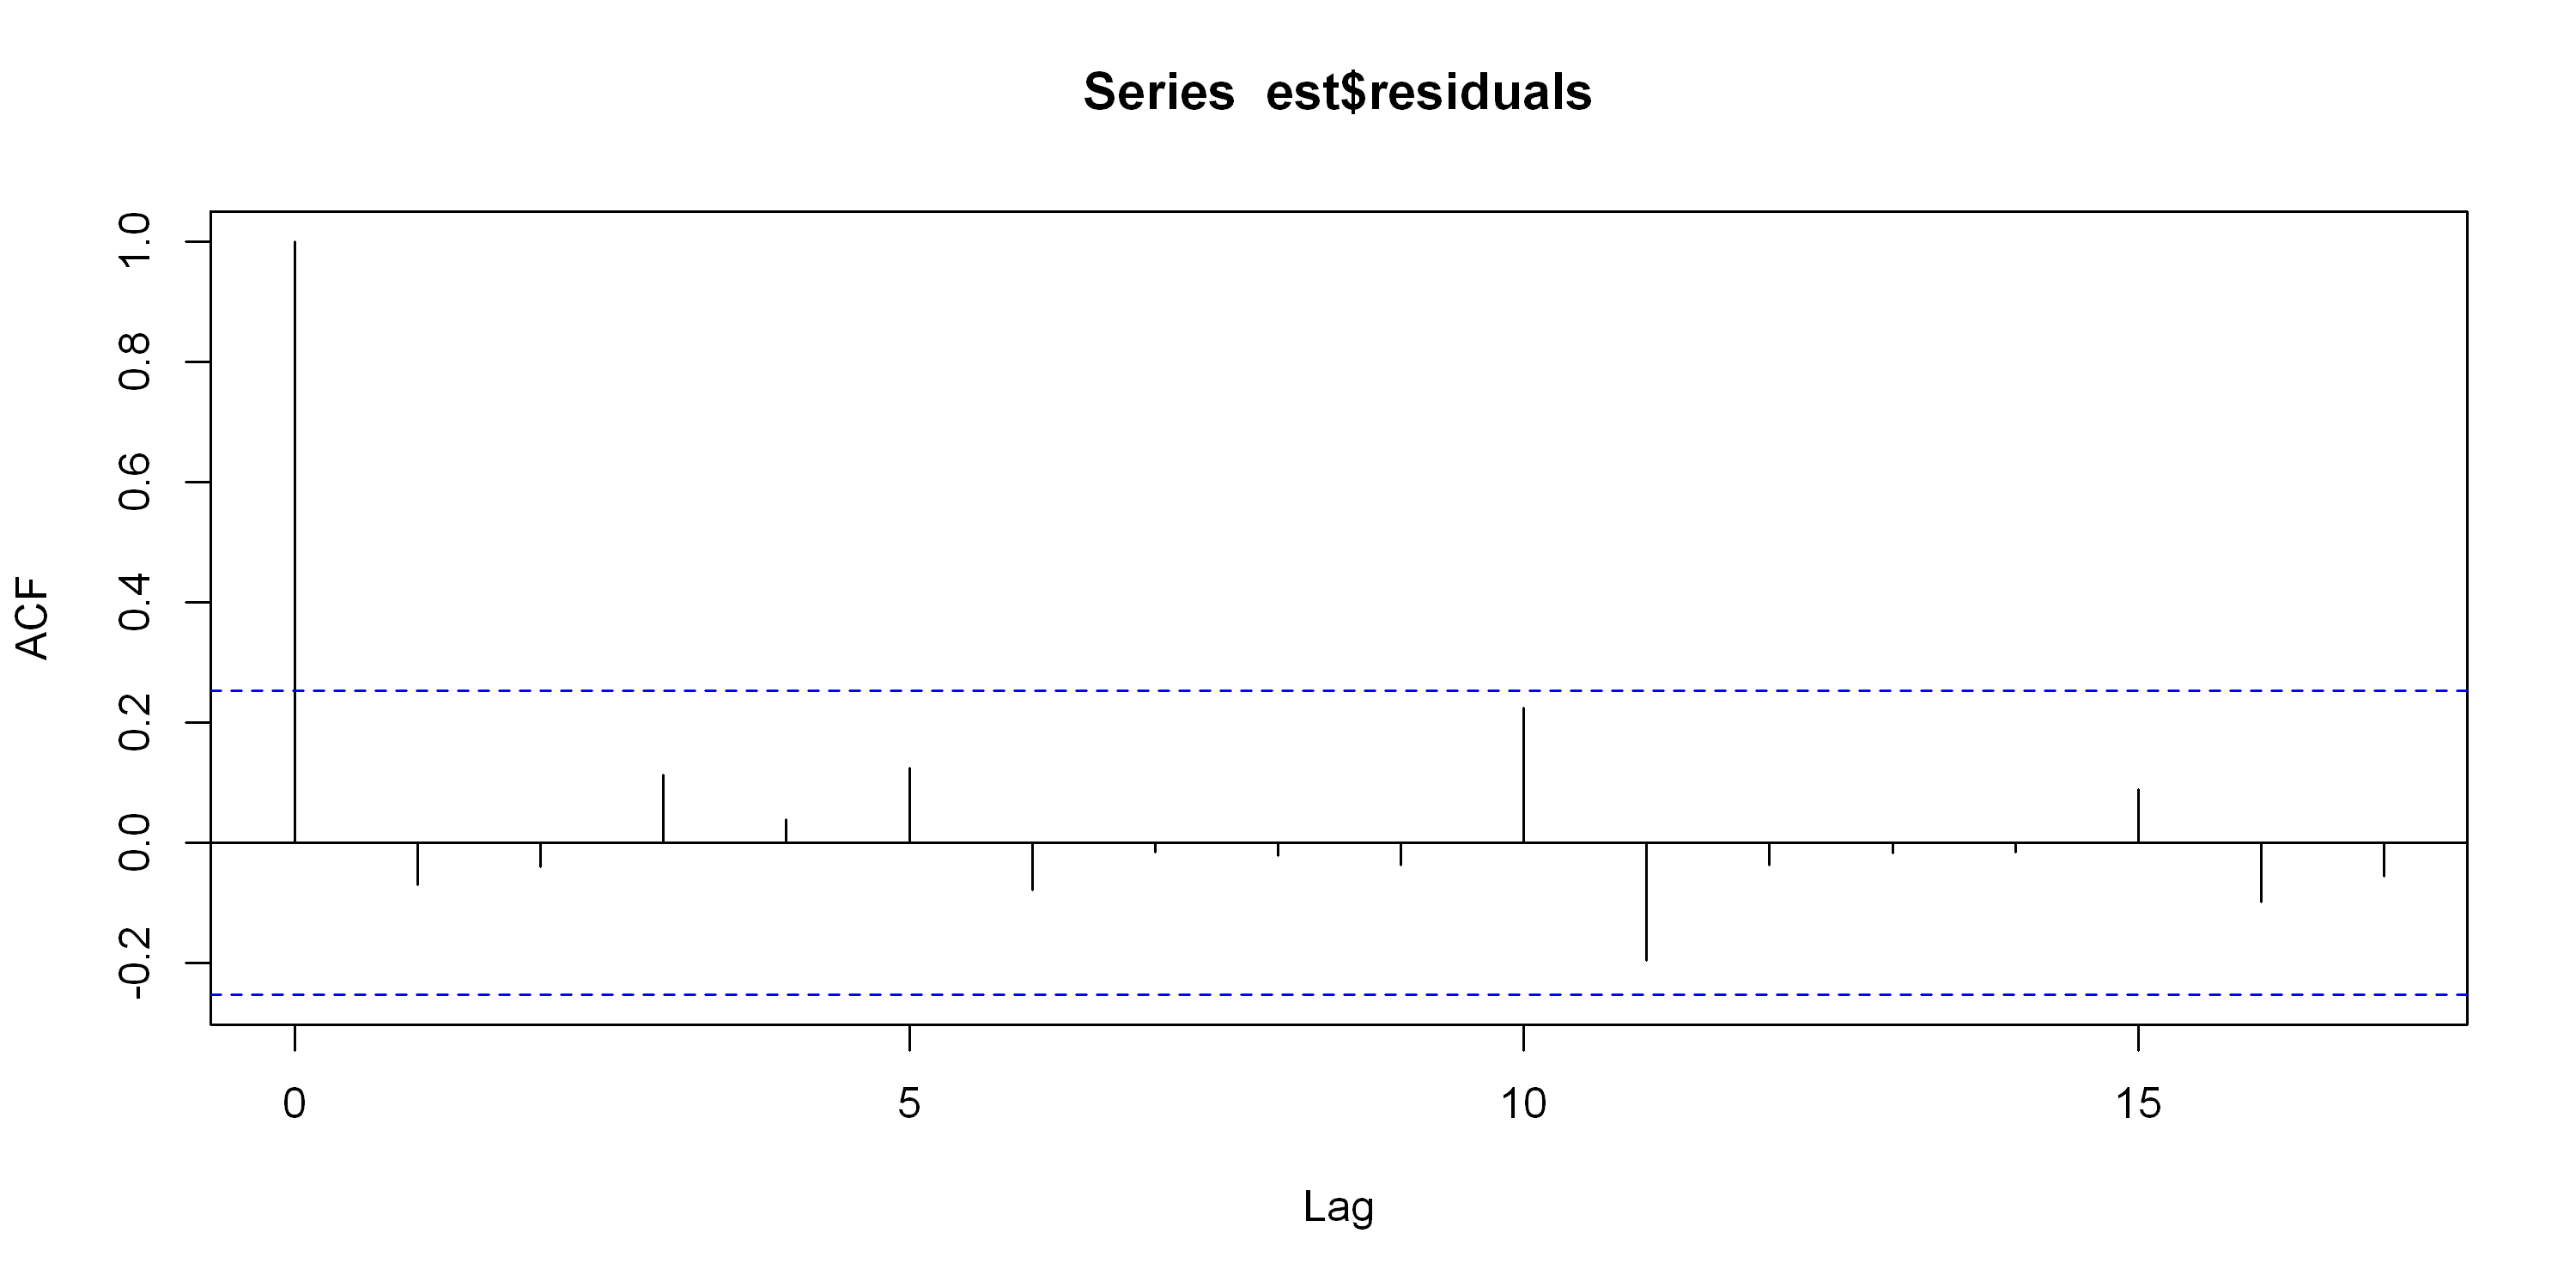

In [109]:
par(bg = "white")
acf(est$residuals)

In [110]:
Box.test(
    est$residuals, lag = 10, type = "Ljung-Box", fitdf=4
)


	Box-Ljung test

data:  est$residuals
X-squared = 6.7066, df = 6, p-value = 0.3488


In [111]:
auto.arima(data$`Banking orders (2)`)

Series: data$`Banking orders (2)` 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
           mean
      79401.483
s.e.   5185.336

sigma^2 = 1.641e+09:  log likelihood = -721.18
AIC=1446.36   AICc=1446.57   BIC=1450.55